# LIMPIEZA DE DATOS

En esta parte vamos a trabajar el proceso de  la limpieza de datos. En primer lugar, limpiaremos y filtraremos datos. En segundo lugar, realizaremos análisis exploratorio de los datos que nos permitirá continuar con la limpieza y pre-procesado de los datos. Dichos análisis los acompañaremos con visualizaciones. Por último, haremos una aproximacion a posibles problemas de regresion y clasificación.

**Particularmente, trabajaremos en 2 ejercicios que girarán en torno a conjuntos de datos relacionados con los menus del McDonals (parte 1) y con el resultado de unas encuestas (parte 2).**

## Practico 1

En esta parte vamos a trabajar con un conjunto de datos relacionado con las características nutricionales de los menús del McDonals (menu2_.csv). Este dataset es una adaptación de los datos disponibles en el repositorio Kaggle.

Adicionalmente, en el dataset reviews.csv aparece la información sobre las opiniones de los menús.

Con ambos datasets se pretende llevar a cabo el proceso de limpieza y la preparación de los datos, realizar un análisis estadístico, y finalmente obtener información/conocimiento de los datos.

### **Parte A:** Para realizar la **limpieza y preparación de los datos**, se solicita:

**1. Carga y primera toma de contacto con el fichero de menú**

1.1. Cargar el csv 'menu_2.csv' y visualizar los cinco primeros registros

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files

In [ ]:
# 1.1 Cargamos documento csv
uploaded = files.upload()

Saving menu_2.csv to menu_2.csv


In [ ]:
# leemos el archivo
df_menu = pd.read_csv('menu_2.csv')
# visualizamos los primeros cinco registros
df_menu.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Observ
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300cal.,120.0,13.0,20.0,5.0,25.0,0.0,...,10.0,4.0,17,3,17.0,10.0,0.0,25.0,15.0,NaN
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70.0,8.0,12.0,3.0,15.0,0.0,...,10.0,4.0,17,3,NaN,6.0,0.0,25.0,8.0,NaN
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200.0,23.0,35.0,8.0,42.0,0.0,...,10.0,4.0,17,2,14.0,8.0,0.0,25.0,10.0,NaN
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250.0,28.0,43.0,10.0,52.0,0.0,...,10.0,4.0,17,2,21.0,15.0,0.0,30.0,15.0,NaN
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210.0,23.0,35.0,8.0,42.0,0.0,...,10.0,4.0,17,2,21.0,6.0,0.0,25.0,10.0,NaN


No ha sido necesario añadir argumentos adicionales para leer correctamente el documento CSV ya que pandas tiene por defecto el separador "," ya que es el estandar para casi todos los archivos CSV, en el caso en que nuestro archivo no se pueda leer correctamente podemos visualizar las primeras lineas del archivo como texto plano y sin comprobar el propio archivo CSV, podriamos ver que separador tiene, tal y como se muestra a continuación:

In [ ]:
# Abrir el archivo en modo texto
with open('menu_2.csv', 'r', encoding='utf-8') as f:
    # Leer las primeras 5 líneas
    for _ in range(5):
        print(f.readline())

Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Observ

Breakfast,Egg McMuffin,4.8 oz (136 g),300cal.,120,13,20,5,25,0,260,87,750,31,31,10,4,17,3,17,10,0,25,15,

Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8,12,3,15,0,25,8,770,32,,10,4,17,3,,6,0,25,8,

Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23,35,8,42,0,45,15,780,33,29,10,4,17,2,14,8,0,25,10,

Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28,43,10,52,0,285,95,860,36,30,10,4,17,2,21,15,0,30,15,



 1.3.	Indicar de qué tipo es cada variable y de qué tipo de dato toma Python a cada variable

A continuacion se indica el tipo de cada variable:

+ Category:	Categórica nominal
+ Item:	Categórica nominal
+ Serving Size:	Categórica nominal (o texto descriptivo)
+ Calories:	Numérica continua
+ Calories from Fat:	Numérica continua
+ Total Fat:	Numérica continua
+ Total Fat (% Daily Value):	Numérica continua (porcentaje)
+ Saturated Fat:	Numérica continua
+ Saturated Fat (% Daily Value):	Numérica continua (porcentaje)
+ Trans Fat:	Numérica continua
+ Cholesterol:	Numérica continua
+ Cholesterol (% Daily Value):	Numérica continua (porcentaje)
+ Sodium:	Numérica continua
+ Sodium (% Daily Value):	Numérica continua (porcentaje)
+ Carbohydrates:	Numérica continua
+ Carbohydrates (% Daily Value):	Numérica continua (porcentaje)
+ Dietary Fiber:	Numérica continua
+ Dietary Fiber (% Daily Value):	Numérica discreta (es un entero, aunque puede tratarse como continua)
+ Sugars:	Numérica discreta
+ Protein:	Numérica continua
+ Vitamin A (% Daily Value):	Numérica continua (porcentaje)
+ Vitamin C (% Daily Value):	Numérica continua (porcentaje)
+ Calcium (% Daily Value):	Numérica continua (porcentaje)
+ Iron (% Daily Value):	Numérica continua (porcentaje)
+ Observ:	Numérica continua (¿observación adicional?)

In [ ]:
# 1.3. Tipo de dato que toma Python para cada variable
df_menu.dtypes

,0
Category,object
Item,object
Serving Size,object
Calories,object
Calories from Fat,float64
Total Fat,float64
Total Fat (% Daily Value),float64
Saturated Fat,float64
Saturated Fat (% Daily Value),float64
Trans Fat,float64


 1.4. Detección de campos que que no estan considerado correctamente

La variable "**Calories**" no esta considerada correctamente, aparece como `object` en lugar de `float64` o `int`, esto puede suceder porque quizas esta variable contenga una mezcla de valores, como numeros y texto o celdas vacias, simbolos especiales, etc. Podemos comprarbarlo con las siguientes lineas de codigo:

In [ ]:
# 1.4
df_menu['Calories'].unique()

array(['300cal.', '250', '370', '450', '400', '430', '460', '520', '410',
       '470', '480', '510', '570', '540', nan, '420', '550', '500', '620',
       '670', '740', '800', '640', '690', '1090', '1150', '990', '1050',
       '350', '300', '150', '290', '260', '530', '600', '610', '750',
       '240cal', '720', '380', '440', '670CAL', '590', '360', '630',
       '540cal.', '190', '280', '940', '1880', '390', '140', '220', '340',
       '330', '230', '110', '20', '15', '160', '45', '200', '100', '0',
       '270', '130', '80', '180', '170', '210', '310', '240', '320',
       '120', '760', '660', '820', '850', '560', '700', '650', '930',
       '810'], dtype=object)

Como podemos observar, varios valores contienen texto pegado a los números como `300cal`, por lo que la considera como object ya que pandaas no puede convertirlos automáticamente a número.

1.5. Comprobar si hay instancias duplicadas

In [ ]:
# 1.5 - Obtenemos los datos duplicados
duplicados = df_menu[df_menu.duplicated()]
print(duplicados)

               Category                                  Item  Serving Size  \
260        Coffee & Tea                    Iced Mocha (Large)  22 fl oz cup   
261        Coffee & Tea   Iced Mocha with Nonfat Milk (Small)  12 fl oz cup   
262        Coffee & Tea  Iced Mocha with Nonfat Milk (Medium)  16 fl oz cup   
263        Coffee & Tea   Iced Mocha with Nonfat Milk (Large)  22 fl oz cup   
264        Coffee & Tea            Iced Caramel Mocha (Small)  12 fl oz cup   
265  Smoothies & Shakes              Strawberry Shake (Large)  22 fl oz cup   

    Calories  Calories from Fat  Total Fat  Total Fat (% Daily Value)  \
260      480              150.0       16.0                       25.0   
261      240               45.0        5.0                        8.0   
262      290               45.0        5.0                        8.0   
263      390               50.0        6.0                        9.0   
264      280              100.0       11.0                       17.0   
265     

1.6. Eliminar las instancias duplicadas para que solo haya filas únicas.

In [ ]:
# 1.6 Eliminamos las duplicadas pero dejamos la primera instancia de cada fila única
df_menu.drop_duplicates(inplace=True)

In [ ]:
# comprobamos nuevamente si hay duplicados
duplicados = df_menu[df_menu.duplicated()]
print(duplicados)

Empty DataFrame
Columns: [Category, Item, Serving Size, Calories, Calories from Fat, Total Fat, Total Fat (% Daily Value), Saturated Fat, Saturated Fat (% Daily Value), Trans Fat, Cholesterol, Cholesterol (% Daily Value), Sodium, Sodium (% Daily Value), Carbohydrates, Carbohydrates (% Daily Value), Dietary Fiber, Dietary Fiber (% Daily Value), Sugars, Protein, Vitamin A (% Daily Value), Vitamin C (% Daily Value), Calcium (% Daily Value), Iron (% Daily Value), Observ]
Index: []

[0 rows x 25 columns]


**1.7. Limpieza de datos numéricos:**

1.7.1 La variable 'Serving Size' es formato objeto ya que es de tipo cadena de texto. Para poder hacer cálculos sobre la variable que representa esta columna, vamos a quedarnos con el primer valor numérico que aparece y guardarlo en una nueva variable (columna) que se llame 'Serving Size oz'.  

In [ ]:
# 1.7.1
# Extraemos el primer número de la columna 'Serving Size' y lo guardamos en una nueva columna
df_menu['Serving Size oz'] = df_menu['Serving Size'].str.extract('(\d+)', expand=False).astype(float)
# Comprobamos los valores
print(df_menu['Serving Size oz'].head())

0    4.0
1    4.0
2    3.0
3    5.0
4    5.0
Name: Serving Size oz, dtype: float64


1.7.2 Eliminar los símbolos o caracteres que imposibilitan que la variable sea tomada como int o float y sea considerada como un objeto o string  
Este paso nos permitirá hacer operaciones y agrupaciones con los valores numéricos. En caso contrario no se podrá hacer ninguna operación matemática con las variables.

In [ ]:
# 1.7.2
# Función para limpiar caracteres y convertir a valores numéricos
def limpiar_calorias(valor):
    try:
        # Reemplazar caracteres no numéricos y convertir a float
        return float(str(valor).replace('cal.', '').replace('CAL', '').replace('cal', '').strip())
    except:
        # manejo de valores vacios
        return np.nan

# Aplicar la función a la columna 'Calories'
df_menu['Calories'] = df_menu['Calories'].apply(limpiar_calorias)

# Verificar la limpieza
print(df_menu['Calories'].unique())



[ 300.  250.  370.  450.  400.  430.  460.  520.  410.  470.  480.  510.
  570.  540.   nan  420.  550.  500.  620.  670.  740.  800.  640.  690.
 1090. 1150.  990. 1050.  350.  150.  290.  260.  530.  600.  610.  750.
  240.  720.  380.  440.  590.  360.  630.  190.  280.  940. 1880.  390.
  140.  220.  340.  330.  230.  110.   20.   15.  160.   45.  200.  100.
    0.  270.  130.   80.  180.  170.  210.  310.  320.  120.  760.  660.
  820.  850.  560.  700.  650.  930.  810.]


**1.8. Limpieza de datos categóricos:**  

1.8.1. Crear una función para convertir estos caracteres en las vocales correspondientes:  ['à', 'é', 'è', 'í', 'ï', 'ó', 'ò', 'ú', 'ü']

In [ ]:
# 1.8.1
# Función para reemplazar caracteres especiales por las vocales correspondientes
def reemplazar_vocales(texto):
    # Diccionario con los caracteres especiales y sus reemplazos
    reemplazos = {
        'à': 'a', 'é': 'e', 'è': 'e',
        'í': 'i', 'ï': 'i', 'ó': 'o',
        'ò': 'o', 'ú': 'u', 'ü': 'u'
    }
    # Reemplazar cada carácter especial en el texto
    for caracter, vocal in reemplazos.items():
        texto = texto.replace(caracter, vocal)
    return texto

# Prueba de la función
texto_original = "à', 'é', 'è', 'í', 'ï', 'ó', 'ò', 'ú', 'ü"
texto_limpio = reemplazar_vocales(texto_original)
print(f"Texto original: {texto_original}")
print(f"Texto limpio: {texto_limpio}")

Texto original: à', 'é', 'è', 'í', 'ï', 'ó', 'ò', 'ú', 'ü
Texto limpio: a', 'e', 'e', 'i', 'i', 'o', 'o', 'u', 'u


1.8.2 Homogeneizar los valores de las variables categóricas que sean cadenas de texto ['Category', 'Item'] de forma que estén todas en minúscula. Esto permitirá que se podrán cruzar diferentes bases de datos y que no se consideren cadenas distintas por aparecer en un caso en mayúsculas y en el otro en minúsculas.

In [ ]:
# 1.8.2
# Convertir valores de las columnas 'Category' y 'Item' a minúsculas
df_menu['Category'] = df_menu['Category'].str.lower()
df_menu['Item'] = df_menu['Item'].str.lower()

# Verificar los resultados
print(df_menu[['Category', 'Item']].head())

    Category                              Item
0  breakfast                      egg mcmuffin
1  breakfast                 egg white delight
2  breakfast                  sausage mcmuffin
3  breakfast         sausage mcmuffin with egg
4  breakfast  sausage mcmuffin with egg whites


1.9. Detectar valores sin sentido y reemplazar por np.nan. Definiremos como valores sin sentido valores negativos.

In [ ]:
# Detectar valores negativos en columnas numéricas específicas
def detectar_negativos(df, columnas):
    negativos = {}
    for columna in columnas:
        # Filtrar valores negativos y almacenarlos
        negativos[columna] = df[df[columna] < 0][columna]
    return negativos

# Definir las columnas que deseamos analizar
columnas_a_verificar = df_menu.columns[3:]

# Detectar valores negativos
valores_negativos = detectar_negativos(df_menu, columnas_a_verificar)

# Mostrar los valores detectados
for columna, valores in valores_negativos.items():
    print(f"Valores negativos en la columna '{columna}':\n{valores}")

Valores negativos en la columna 'Calories':
Series([], Name: Calories, dtype: float64)
Valores negativos en la columna 'Calories from Fat':
188   -30.0
Name: Calories from Fat, dtype: float64
Valores negativos en la columna 'Total Fat':
184   -11.0
Name: Total Fat, dtype: float64
Valores negativos en la columna 'Total Fat (% Daily Value)':
Series([], Name: Total Fat (% Daily Value), dtype: float64)
Valores negativos en la columna 'Saturated Fat':
208   -3.0
Name: Saturated Fat, dtype: float64
Valores negativos en la columna 'Saturated Fat (% Daily Value)':
Series([], Name: Saturated Fat (% Daily Value), dtype: float64)
Valores negativos en la columna 'Trans Fat':
Series([], Name: Trans Fat, dtype: float64)
Valores negativos en la columna 'Cholesterol':
220   -20.0
Name: Cholesterol, dtype: float64
Valores negativos en la columna 'Cholesterol (% Daily Value)':
Series([], Name: Cholesterol (% Daily Value), dtype: float64)
Valores negativos en la columna 'Sodium':
207   -80.0
Name: Sodium

In [ ]:
# 1.9
# Detectar y reemplazar valores negativos en todo el DataFrame usando map en cada columna
df_menu = df_menu.apply(lambda col: col.map(lambda x: np.nan if isinstance(x, (int, float)) and x < 0 else x))

# Verificar los resultados
print(df_menu.head())

    Category                              Item    Serving Size  Calories  \
0  breakfast                      egg mcmuffin  4.8 oz (136 g)     300.0   
1  breakfast                 egg white delight  4.8 oz (135 g)     250.0   
2  breakfast                  sausage mcmuffin  3.9 oz (111 g)     370.0   
3  breakfast         sausage mcmuffin with egg  5.7 oz (161 g)     450.0   
4  breakfast  sausage mcmuffin with egg whites  5.7 oz (161 g)     400.0   

   Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0              120.0       13.0                       20.0            5.0   
1               70.0        8.0                       12.0            3.0   
2              200.0       23.0                       35.0            8.0   
3              250.0       28.0                       43.0           10.0   
4              210.0       23.0                       35.0            8.0   

   Saturated Fat (% Daily Value)  Trans Fat  ...  Dietary Fiber  \
0            

**1.10. Lidiar con los nan:**

1.10.1. Obtener un mapa de calor (heatmap) en el que se pueda visualizar facilmente los nan que exiten en el dataset.

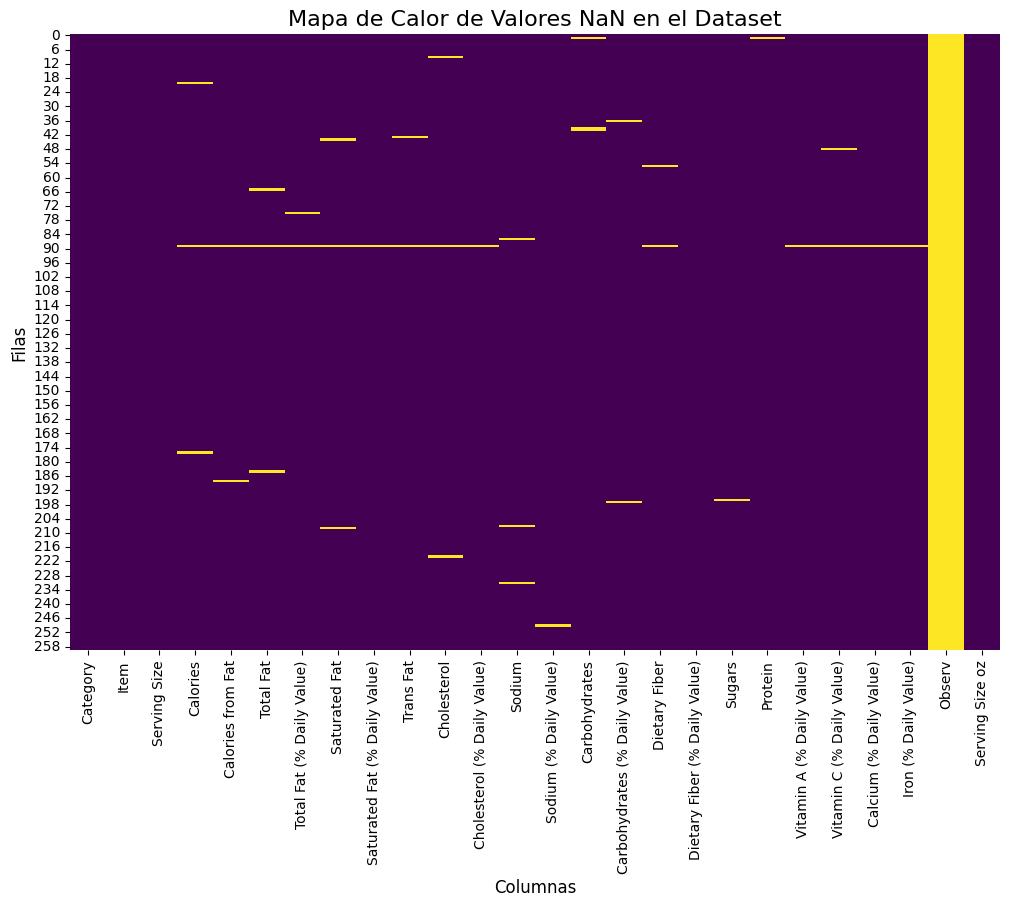

In [ ]:
# 1.10.1

# Crear el mapa de calor para visualizar los valores NaN
plt.figure(figsize=(12, 8))  # Ajusta el tamaño del gráfico
sns.heatmap(df_menu.isna(), cmap='viridis', cbar=False)

# Títulos y etiquetas
plt.title('Mapa de Calor de Valores NaN en el Dataset', fontsize=16)
plt.xlabel('Columnas', fontsize=12)
plt.ylabel('Filas', fontsize=12)

# Mostrar el gráfico
plt.show()

1.10.2. Eliminar filas y columnas con todos los valores a NAN.

In [ ]:
# 1.10.2
# Crear un condicional dentro de un bucle para eliminar filas y columnas con todos sus valores a NaN
def eliminar_nan(df):
    # Eliminar filas con todos los valores NaN
    for index, row in df.iterrows():
        if row.isnull().all():
            df.drop(index, inplace=True)

    # Eliminar columnas con todos los valores NaN
    for columna in df.columns:
        if df[columna].isnull().all():
            df.drop(columns=columna, inplace=True)

    return df

# Aplicar la función al DataFrame
df_menu = eliminar_nan(df_menu)

# Verificar resultados
print(df_menu.head())

    Category                              Item    Serving Size  Calories  \
0  breakfast                      egg mcmuffin  4.8 oz (136 g)     300.0   
1  breakfast                 egg white delight  4.8 oz (135 g)     250.0   
2  breakfast                  sausage mcmuffin  3.9 oz (111 g)     370.0   
3  breakfast         sausage mcmuffin with egg  5.7 oz (161 g)     450.0   
4  breakfast  sausage mcmuffin with egg whites  5.7 oz (161 g)     400.0   

   Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0              120.0       13.0                       20.0            5.0   
1               70.0        8.0                       12.0            3.0   
2              200.0       23.0                       35.0            8.0   
3              250.0       28.0                       43.0           10.0   
4              210.0       23.0                       35.0            8.0   

   Saturated Fat (% Daily Value)  Trans Fat  ...  \
0                           

1.10.3. Obtener el porcentaje de registros a NAN que tiene cada categoría.  

In [ ]:
# 1.10.3
# Función para calcular el porcentaje de NaNs por categoría
nan_percentage_by_category = df_menu.groupby('Category').apply(lambda x: x.isnull().mean() * 100)

# Mostrar el resultado
print(nan_percentage_by_category)


                    Category  Item  Serving Size   Calories  \
Category                                                      
beef & pork              0.0   0.0           0.0   0.000000   
beverages                0.0   0.0           0.0   0.000000   
breakfast                0.0   0.0           0.0   2.380952   
chicken & fish           0.0   0.0           0.0   0.000000   
coffee & tea             0.0   0.0           0.0   1.052632   
desserts                 0.0   0.0           0.0   0.000000   
salads                   0.0   0.0           0.0  16.666667   
smoothies & shakes       0.0   0.0           0.0   0.000000   
snacks & sides           0.0   0.0           0.0   0.000000   

                    Calories from Fat  Total Fat  Total Fat (% Daily Value)  \
Category                                                                      
beef & pork                  0.000000   0.000000                   0.000000   
beverages                    0.000000   0.000000                   0.

<ipython-input-18-e1c7c0d37759>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nan_percentage_by_category = df_menu.groupby('Category').apply(lambda x: x.isnull().mean() * 100)


1.10.4. Obtener el porcentaje de NAN que tiene cada elemento (fila).

In [ ]:
# 1.10.4
# Definir funcion para obtener procentaje de NAN por fila
def calcular_porcentaje_nan_fila(fila):
    return fila.isna().mean() * 100

# Aplicamos la funcion
df_menu['% NaN por fila'] = df_menu.apply(calcular_porcentaje_nan_fila, axis=1)

print(df_menu.head())

    Category                              Item    Serving Size  Calories  \
0  breakfast                      egg mcmuffin  4.8 oz (136 g)     300.0   
1  breakfast                 egg white delight  4.8 oz (135 g)     250.0   
2  breakfast                  sausage mcmuffin  3.9 oz (111 g)     370.0   
3  breakfast         sausage mcmuffin with egg  5.7 oz (161 g)     450.0   
4  breakfast  sausage mcmuffin with egg whites  5.7 oz (161 g)     400.0   

   Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0              120.0       13.0                       20.0            5.0   
1               70.0        8.0                       12.0            3.0   
2              200.0       23.0                       35.0            8.0   
3              250.0       28.0                       43.0           10.0   
4              210.0       23.0                       35.0            8.0   

   Saturated Fat (% Daily Value)  Trans Fat  ...  Dietary Fiber  \
0            

1.10.5. Eliminar las categorias y elementos (filas) que tengan más del 10% de nan  

In [ ]:
#1.10.5
# Eliminar filas con más del 10% de NaN usando la columna '% NaN por fila'
filas_antes = len(df_menu)
df_menu = df_menu[df_menu['% NaN por fila'] <= 10]
filas_despues = len(df_menu)

# Mostrar si se eliminaron filas
if filas_antes > filas_despues:
    print(f"Se eliminaron {filas_antes - filas_despues} filas con más del 10% de valores NaN.")
else:
    print("No se eliminaron filas con más del 10% de valores NaN.")

Se eliminaron 1 filas con más del 10% de valores NaN.


In [ ]:
# Obtener categorías con menos del 10% de NaN
categorias_validas = nan_percentage_by_category[nan_percentage_by_category.mean(axis=1) <= 10].index

# Filtrar el DataFrame para incluir solo esas categorías
categorias_antes = df_menu['Category'].nunique()
df_menu = df_menu[df_menu['Category'].isin(categorias_validas)]
categorias_despues = df_menu['Category'].nunique()

# Mostrar si se eliminaron categorías
if categorias_antes > categorias_despues:
    print(f"Se eliminaron {categorias_antes - categorias_despues} categorías con más del 10% de valores NaN.")
else:
    print("No se eliminaron categorías con más del 10% de valores NaN.")

No se eliminaron categorías con más del 10% de valores NaN.


1.10.6. En las variables que tengan menos de 10% de nan, imputar los valores con su mediana calculada con los datos disponibles de la variable (de cada columna en concreto)

In [ ]:
# 1.10.6
# Imputar valores NaN con la mediana de cada columna numérica (menos del 10% de NaN)
for columna in df_menu.select_dtypes(include=['float64', 'int64']).columns:  # Filtrar columnas numéricas
    porcentaje_nan = df_menu[columna].isnull().mean() * 100
    if porcentaje_nan < 10:
        # Calcular la mediana de la columna ignorando los NaN
        mediana = df_menu[columna].median()
        # Imputar los NaN con la mediana sin usar inplace=True
        df_menu[columna] = df_menu[columna].fillna(mediana)

# Recalcular el porcentaje de NaN por fila después de la imputación
df_menu['% NaN por fila'] = df_menu.apply(lambda fila: fila.isnull().mean() * 100, axis=1)

# Verificar el resultado
print("Imputación completada. Revisión del DataFrame:")
print(df_menu.head())

# Comprobar si aún quedan filas con NaN
print("\nPorcentaje de NaN por fila actualizado:")
print(df_menu['% NaN por fila'].value_counts())

Imputación completada. Revisión del DataFrame:
    Category                              Item    Serving Size  Calories  \
0  breakfast                      egg mcmuffin  4.8 oz (136 g)     300.0   
1  breakfast                 egg white delight  4.8 oz (135 g)     250.0   
2  breakfast                  sausage mcmuffin  3.9 oz (111 g)     370.0   
3  breakfast         sausage mcmuffin with egg  5.7 oz (161 g)     450.0   
4  breakfast  sausage mcmuffin with egg whites  5.7 oz (161 g)     400.0   

   Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0              120.0       13.0                       20.0            5.0   
1               70.0        8.0                       12.0            3.0   
2              200.0       23.0                       35.0            8.0   
3              250.0       28.0                       43.0           10.0   
4              210.0       23.0                       35.0            8.0   

   Saturated Fat (% Daily Value) 

1.10.7. Nuevo mapa de calor sin los NAN

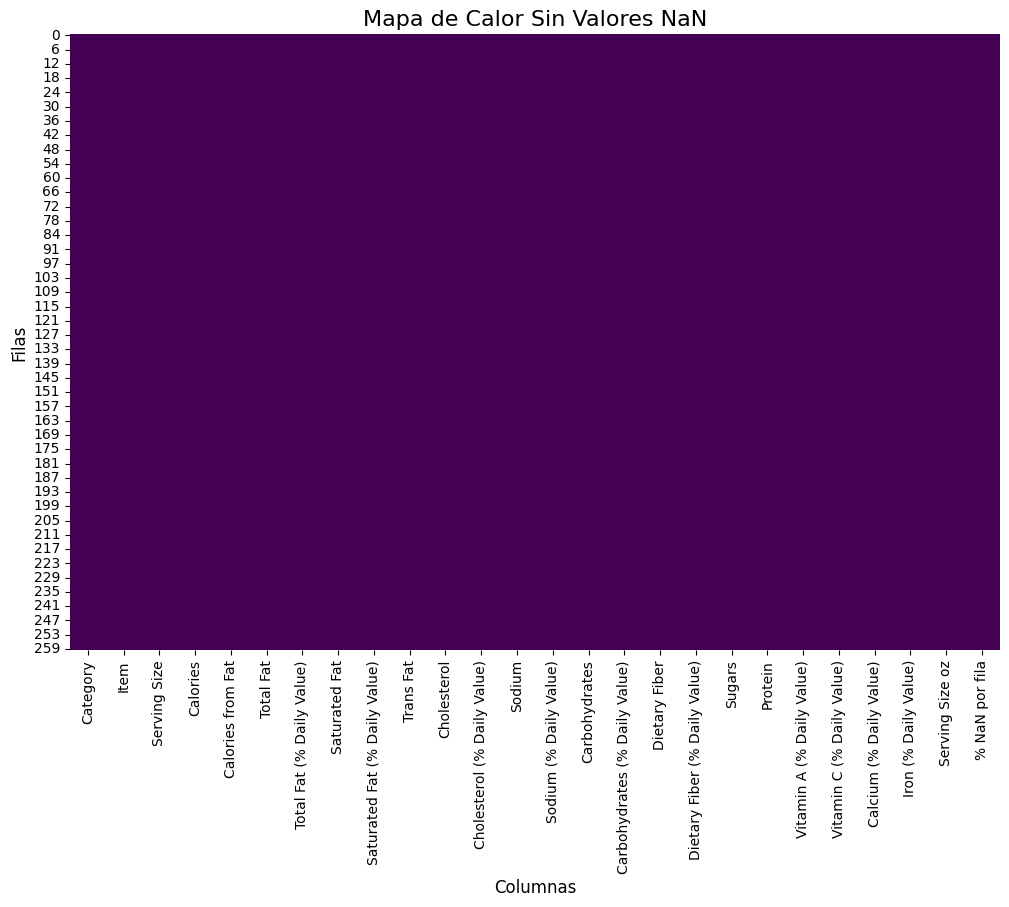

In [ ]:
#1.10.7
# Crear el mapa de calor del DataFrame sin valores NaN
plt.figure(figsize=(12, 8))  # Ajustar el tamaño del gráfico
sns.heatmap(df_menu.notnull(), cmap='viridis', cbar=False)

# Títulos y etiquetas
plt.title('Mapa de Calor Sin Valores NaN', fontsize=16)
plt.xlabel('Columnas', fontsize=12)
plt.ylabel('Filas', fontsize=12)

# Mostrar el gráfico
plt.show()

En el mapa de calor, tal y como podemos observar, aparece completamente limpio, lo que nos ayuda a verificar de forma rapida que los NaN han sido eliminados o imputados correctamente.

**2. Carga y primera toma de contacto con el fichero de review**

2.1. Cargar el csv 'reviews.csv' y visualizar los cinco primeros registros

In [ ]:
# 2.1
# Cargamos documento csv
uploaded = files.upload()

Saving reviews.csv to reviews (2).csv


In [ ]:
# leemos el archivo
df_reviews = pd.read_csv('reviews.csv')
# visualizamos los primeros cinco registros
df_reviews.head()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 8, saw 2


Al intentar abrir el documento CSV hemos obtenido el anterior error, esto puede ser por el separador de dicho archivo, con las siguientes lineas de codigo obtendremos el separador del documento y de esta forma saber como tratar su lectura.

In [ ]:
# Abrir el archivo en modo texto
with open('reviews.csv', 'r', encoding='utf-8') as f:
    # Leer las primeras 5 líneas
    for _ in range(5):
        print(f.readline())

Category|Item|Reviews|Stars

breakfast|egg mcmuffin|575|5

breakfast|egg white delight|680|0

breakfast|sausage mcmuffin|398|5

breakfast|sausage mcmuffin with egg|766|2



In [ ]:
# Leer el archivo CSV con el separador '|'
df_reviews = pd.read_csv('reviews.csv', sep='|')

# Verificar los datos cargados
print(df_reviews.head())


    Category                              Item  Reviews  Stars
0  breakfast                      egg mcmuffin      575      5
1  breakfast                 egg white delight      680      0
2  breakfast                  sausage mcmuffin      398      5
3  breakfast         sausage mcmuffin with egg      766      2
4  breakfast  sausage mcmuffin with egg whites        6      5


2.3. Agregar al valor de Stars la palabra stars de forma que la variable 'Stars' se convierta en una variable categórica con valores atendiendo a la forma 'X stars'. Es decir, en vez de 5 -> 5 stars

In [ ]:
# 2.3
df_reviews['Stars'] = df_reviews['Stars'].apply(lambda x: f"{x} stars" if pd.notnull(x) else x)
# Verificar los resultados
print(df_reviews)

               Category                              Item  Reviews    Stars
0             breakfast                      egg mcmuffin      575  5 stars
1             breakfast                 egg white delight      680  0 stars
2             breakfast                  sausage mcmuffin      398  5 stars
3             breakfast         sausage mcmuffin with egg      766  2 stars
4             breakfast  sausage mcmuffin with egg whites        6  5 stars
..                  ...                               ...      ...      ...
245  smoothies & shakes          strawberry shake (large)       65  1 stars
246  smoothies & shakes           chocolate shake (small)      287  5 stars
247  smoothies & shakes          chocolate shake (medium)      770  0 stars
248  smoothies & shakes           chocolate shake (large)      161  3 stars
249  smoothies & shakes           shamrock shake (medium)      109  0 stars

[250 rows x 4 columns]


2.4. Combinar el dataframe obtenido al completar la parte 1 del ejercicio A y el dataframe de esta parte 2. Para ello, emplear los atributos ['Category', 'Item']

In [ ]:
# 2.4
# Combinar los DataFrames usando 'Category' y 'Item' como claves
df_combinado = pd.merge(df_menu, df_reviews, on=['Category', 'Item'], how='outer')

# Verificar el resultado
print("Primeras filas del DataFrame combinado:")
print(df_combinado)

Primeras filas del DataFrame combinado:
           Category                                Item    Serving Size  \
0       beef & pork              bacon clubhouse burger  9.5 oz (270 g)   
1       beef & pork                      bacon mcdouble  5.7 oz (161 g)   
2       beef & pork                             big mac  7.4 oz (211 g)   
3       beef & pork                        cheeseburger    4 oz (113 g)   
4       beef & pork                        daily double  6.7 oz (190 g)   
..              ...                                 ...             ...   
263  snacks & sides                 medium french fries  3.9 oz (111 g)   
264  snacks & sides   ranch snack wrap (crispy chicken)  4.5 oz (128 g)   
265  snacks & sides  ranch snack wrap (grilled chicken)  4.3 oz (121 g)   
266  snacks & sides                          side salad   3.1 oz (87 g)   
267  snacks & sides                  small french fries   2.6 oz (75 g)   

     Calories  Calories from Fat  Total Fat  Total Fat (% D

2.5. Eliminar las columnas ['Serving Size', 'per_nan']

In [ ]:
# 2.5
# Eliminamos las columnas
df_combinado = df_combinado.drop(columns=['Serving Size', '% NaN por fila'])

#Verificamos el resultado
print(df_combinado.head())

      Category                    Item  Calories  Calories from Fat  \
0  beef & pork  bacon clubhouse burger     720.0              360.0   
1  beef & pork          bacon mcdouble     440.0              200.0   
2  beef & pork                 big mac     530.0              240.0   
3  beef & pork            cheeseburger     290.0              100.0   
4  beef & pork            daily double     430.0              200.0   

   Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0       40.0                       62.0           15.0   
1       22.0                       34.0           10.0   
2       27.0                       42.0           10.0   
3       11.0                       18.0            5.0   
4       22.0                       35.0            9.0   

   Saturated Fat (% Daily Value)  Trans Fat  Cholesterol  ...  \
0                           75.0        1.5        115.0  ...   
1                           49.0        1.0         90.0  ...   
2                           4

2.6. Muestra el registro con mayor número de Reviews y el registro con menor número de Reviews

In [ ]:
# 2.6
# Obtenemos el registro con mayor número de reviews
registro_maxReviews = df_combinado.loc[df_combinado['Reviews'].idxmax()]

# Obtenemos el regitro con menor número de reviews
registro_minReviews = df_combinado.loc[df_combinado['Reviews'].idxmin()]

print("Registro con mayor número de Reviews:")
print(registro_maxReviews)
print("\nRegistro con menor número de Reviews:")
print(registro_minReviews)


Registro con mayor número de Reviews:
Category                                          smoothies & shakes
Item                             strawberry banana smoothie (medium)
Calories                                                       250.0
Calories from Fat                                                5.0
Total Fat                                                        1.0
Total Fat (% Daily Value)                                        1.0
Saturated Fat                                                    0.0
Saturated Fat (% Daily Value)                                    0.0
Trans Fat                                                        0.0
Cholesterol                                                      5.0
Cholesterol (% Daily Value)                                      1.0
Sodium                                                          60.0
Sodium (% Daily Value)                                           2.0
Carbohydrates                                                   5

### **Parte B.** **Análisis estadístico**:

1. Obtener las principales métricas estadísticas (media, mediana, desviación estándar, percentil 25, percentil 75, moda, máximo, mínimo) de las variables numéricas.

In [ ]:
# 1
# Seleccionar las columnas numéricas
df_numeric = df_combinado.select_dtypes(include=['float64', 'int64'])

# Obtener un resumen estadístico de las columnas numéricas
summary = df_numeric.describe()

# Mostrar el resumen
print(summary)


          Calories  Calories from Fat   Total Fat  Total Fat (% Daily Value)  \
count   259.000000         259.000000  259.000000                 259.000000   
mean    368.996139         127.548263   14.158301                  21.795367   
std     240.372684         127.957541   14.226505                  21.915284   
min       0.000000           0.000000    0.000000                   0.000000   
25%     210.000000          20.000000    2.250000                   3.500000   
50%     340.000000         100.000000   11.000000                  17.000000   
75%     500.000000         200.000000   22.500000                  35.000000   
max    1880.000000        1060.000000  118.000000                 182.000000   

       Saturated Fat  Saturated Fat (% Daily Value)   Trans Fat  Cholesterol  \
count     259.000000                     259.000000  259.000000   259.000000   
mean        5.998069                      30.030888    0.198842    54.942085   
std         5.307319                   

2. Representar distribución de las variables numéricas y realizar el test de normalidad a cada una de ellas para valorar si siguen una distribución normal.


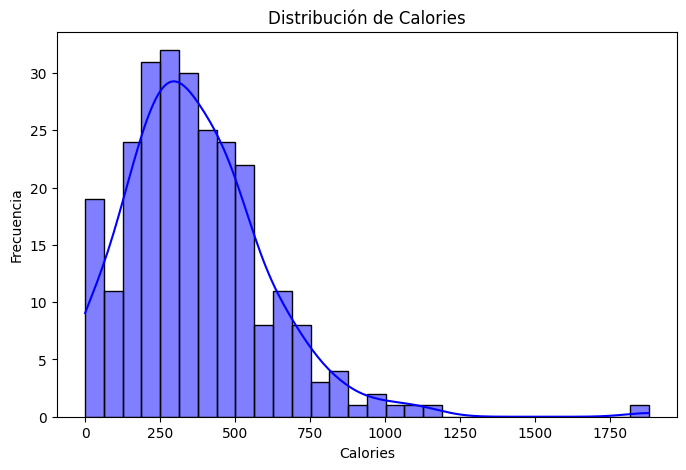

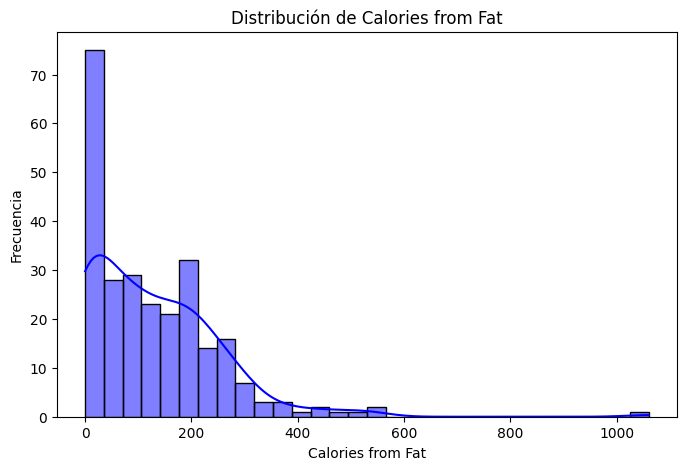

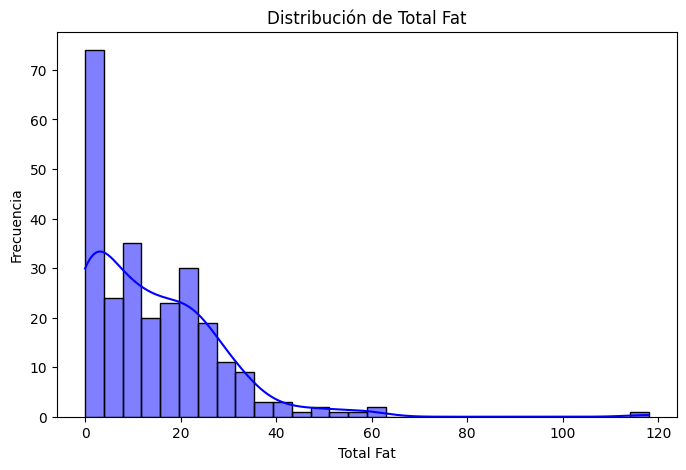

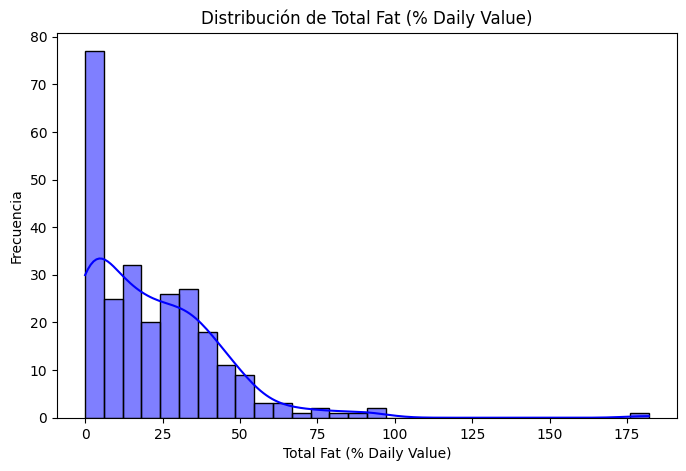

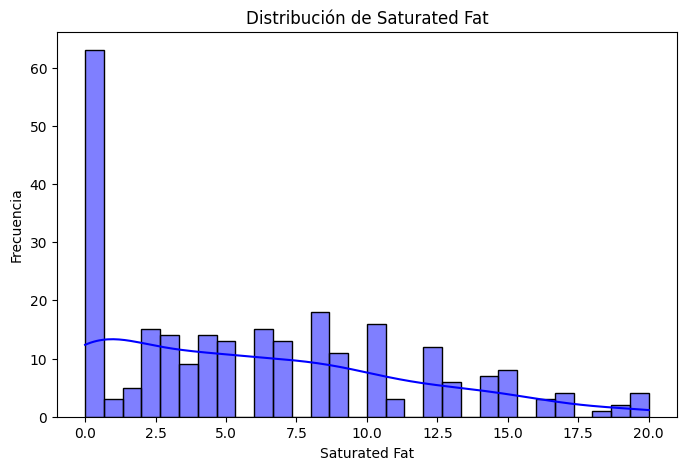

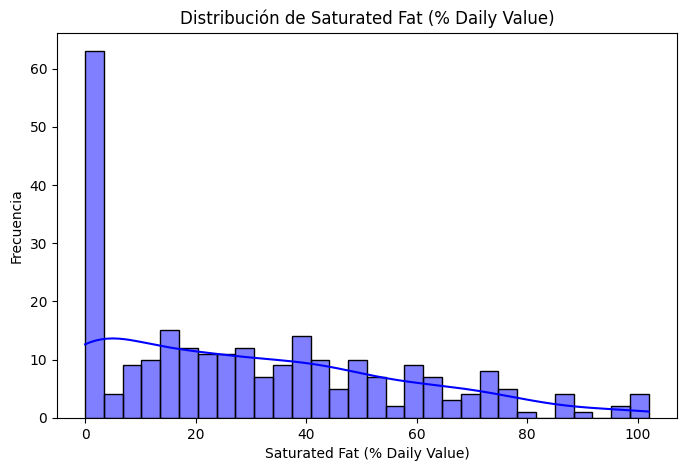

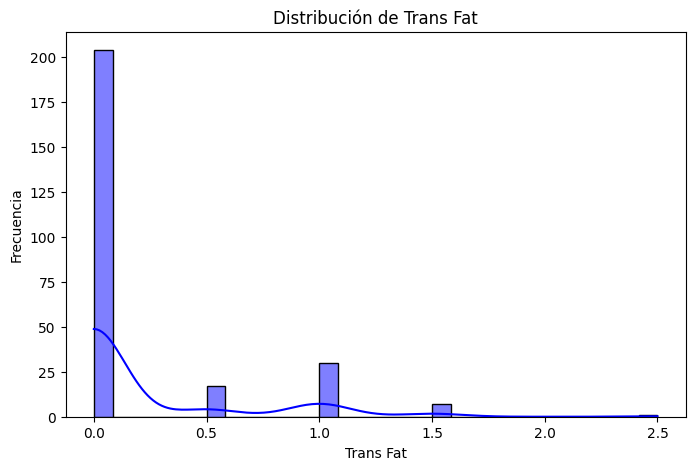

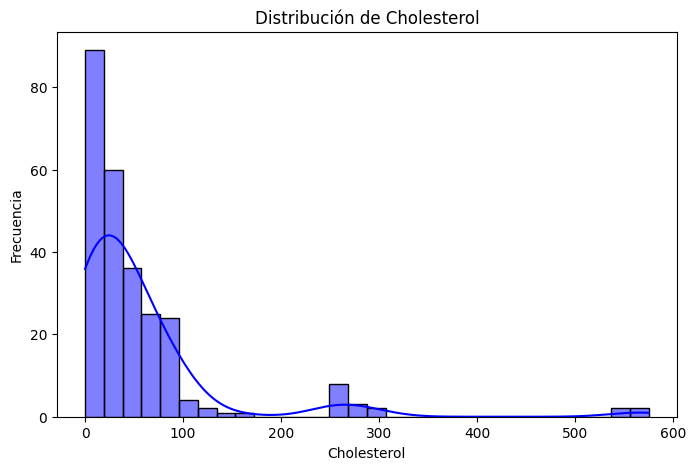

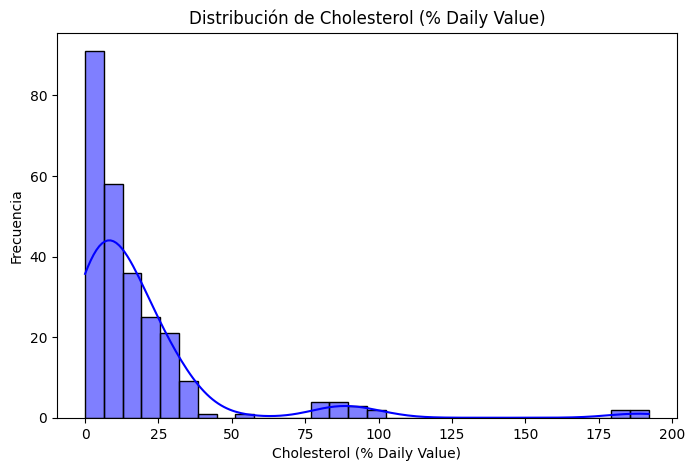

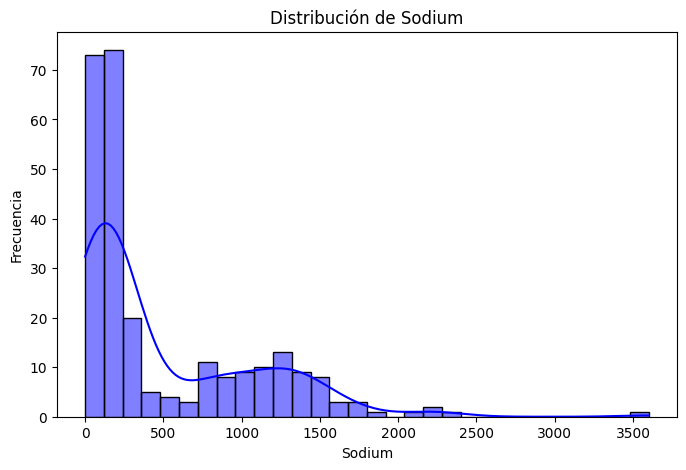

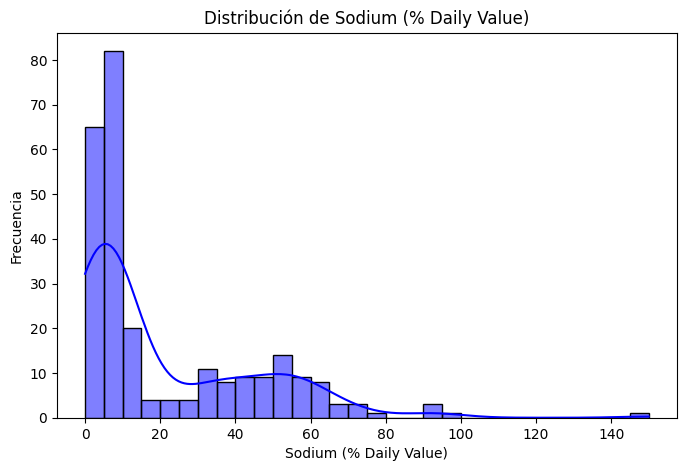

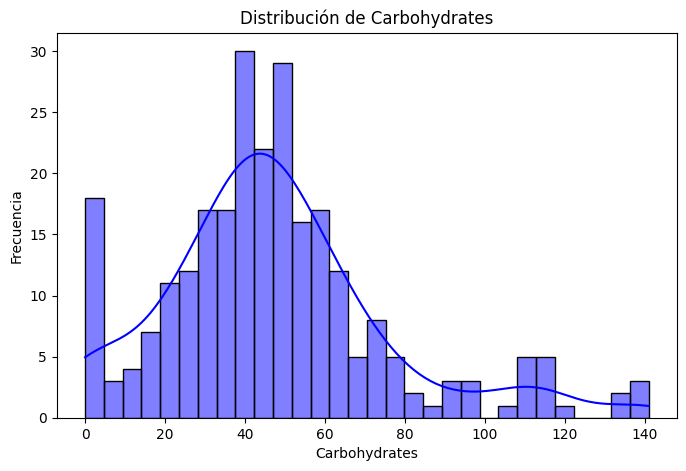

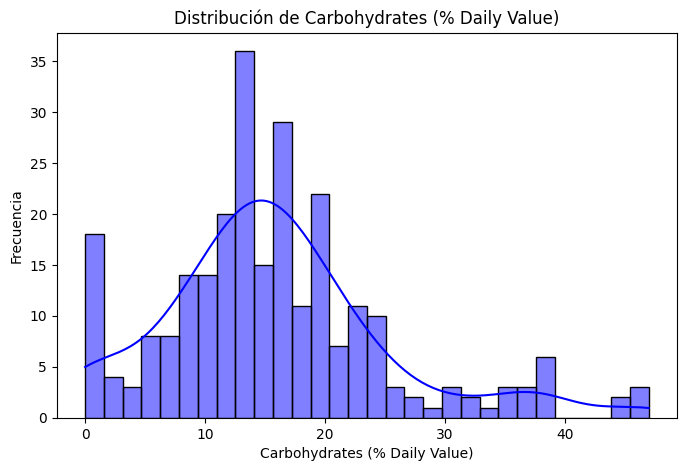

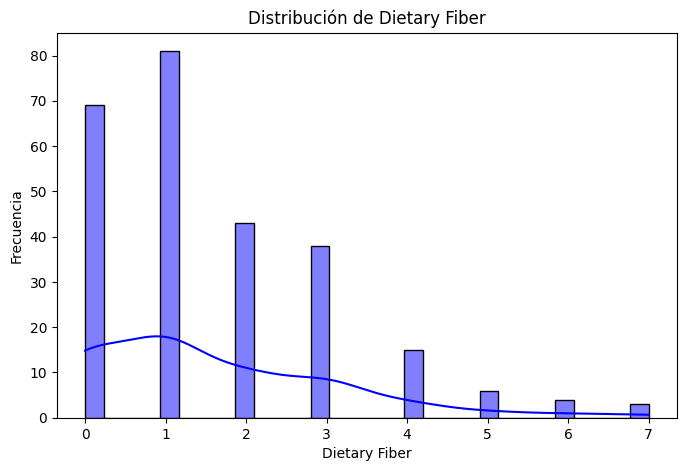

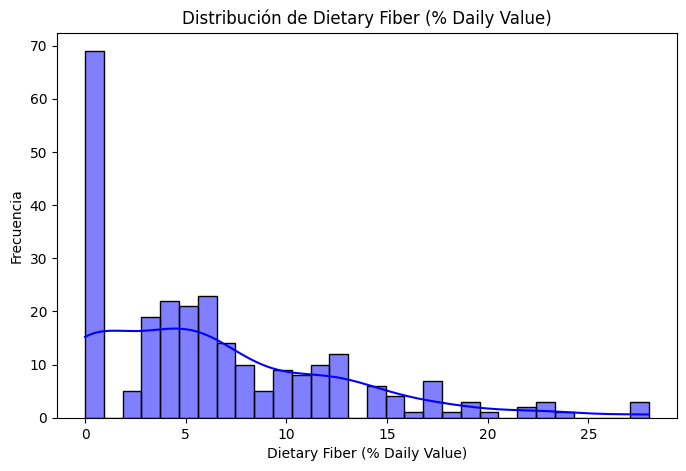

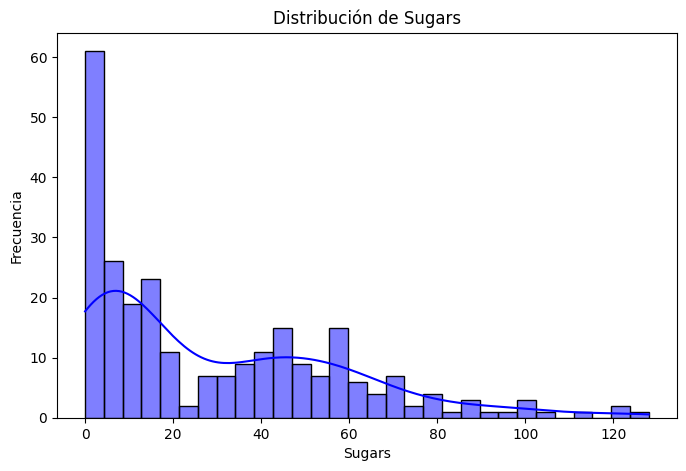

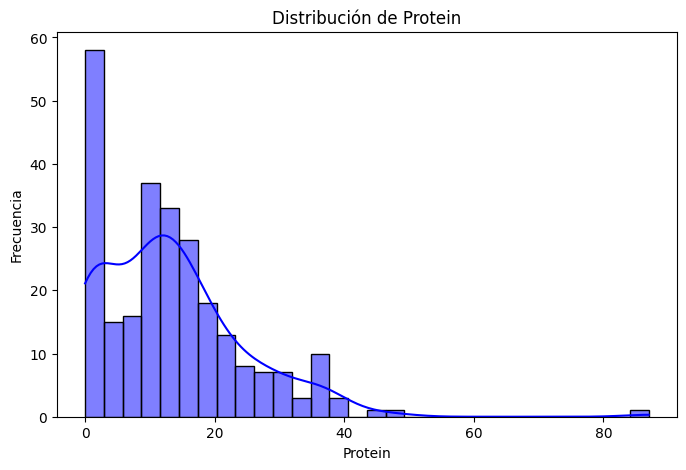

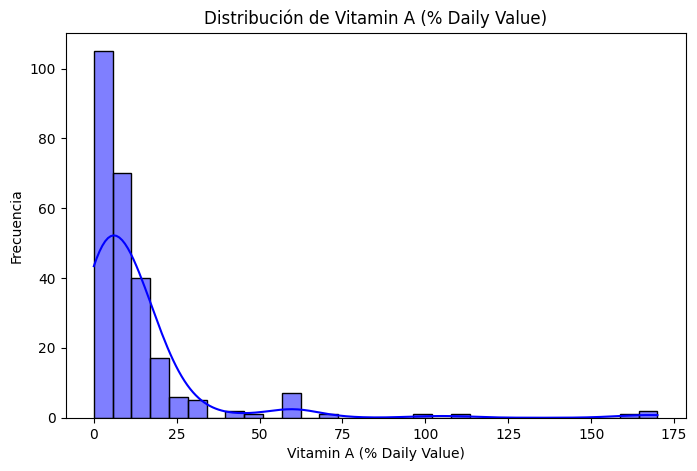

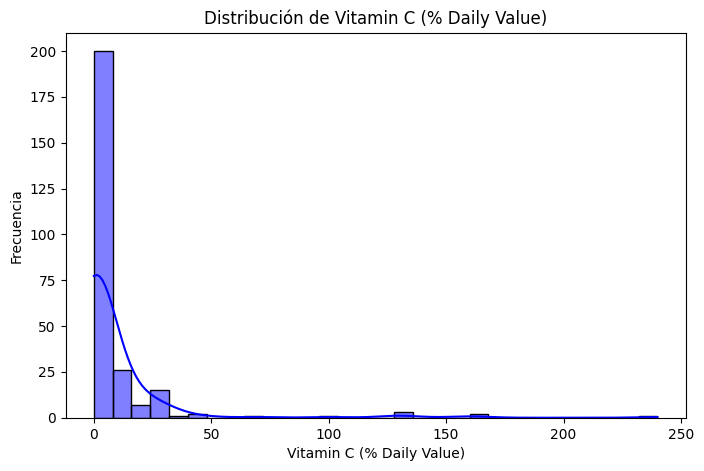

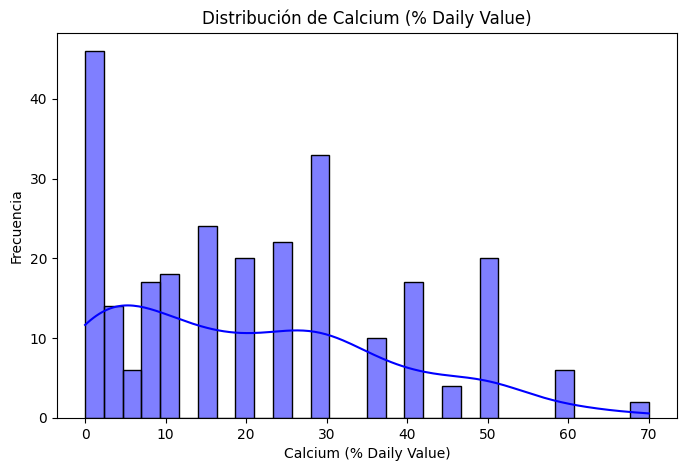

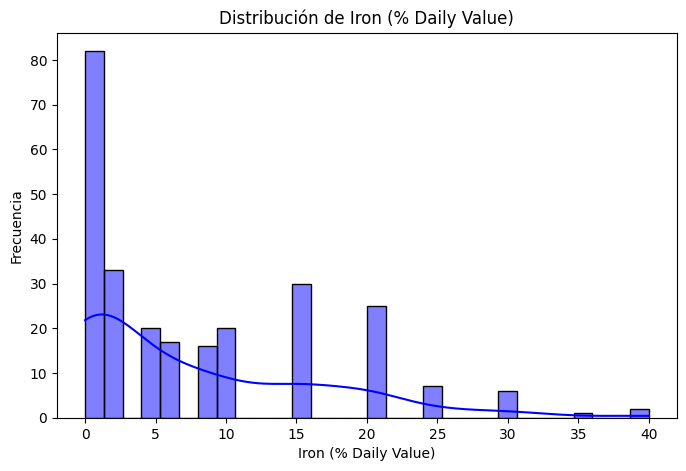

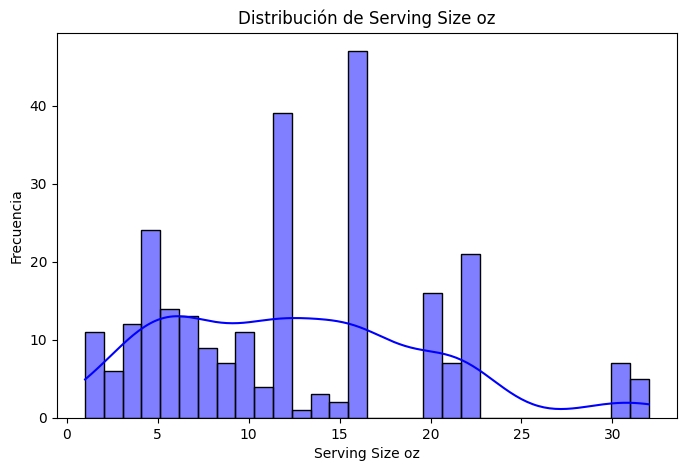

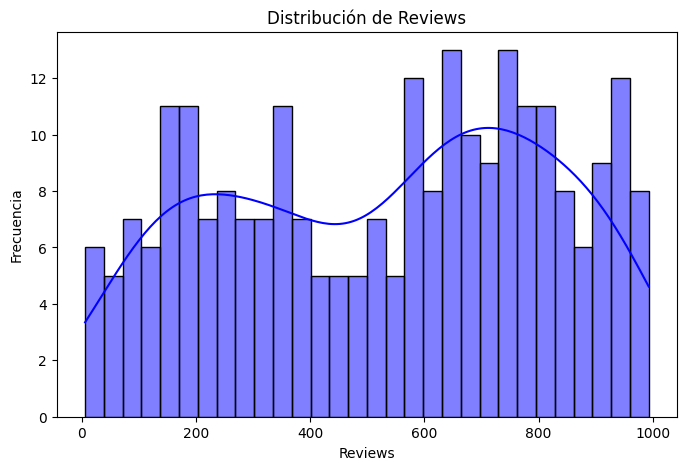

In [ ]:
# 2
# Representar la distribución de cada columna numérica
for columna in df_numeric.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_numeric[columna], kde=True, bins=30, color='blue')
    plt.title(f'Distribución de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.show()

El test de normalidad que vamos a utilizar es el de **Shapiro-Wilk**, este test evlúa si una variable sigue una distribución normal.
El p-value indica si hay evidencia significativa de no normalidad:

+ p-value > 0.05: no hay evidencia suficiente para rechazar la hipótesis nula → **la variable puede ser normal**.
+ p-values &le; 0.05: se rechaza la hipótesis nula → **la variable no sigue distribución normal**.

In [ ]:
from scipy.stats import shapiro

# Test de normalidad para cada columna numérica
for columna in df_numeric.columns:
    stat, p_value = shapiro(df_numeric[columna].dropna())  # Excluir NaNs
    print(f"Test de Shapiro-Wilk para '{columna}':")
    print(f"Estadístico = {stat}, P-value = {p_value}")
    if p_value > 0.05:
        print(f"La variable '{columna}' sigue una distribución normal (p > 0.05).\n")
    else:
        print(f"La variable '{columna}' NO sigue una distribución normal (p ≤ 0.05).\n")

Test de Shapiro-Wilk para 'Calories':
Estadístico = 0.9192427145905885, P-value = 1.2377824236933094e-10
La variable 'Calories' NO sigue una distribución normal (p ≤ 0.05).

Test de Shapiro-Wilk para 'Calories from Fat':
Estadístico = 0.8325640028956993, P-value = 4.957652932923554e-16
La variable 'Calories from Fat' NO sigue una distribución normal (p ≤ 0.05).

Test de Shapiro-Wilk para 'Total Fat':
Estadístico = 0.8318256038967367, P-value = 4.55993524478879e-16
La variable 'Total Fat' NO sigue una distribución normal (p ≤ 0.05).

Test de Shapiro-Wilk para 'Total Fat (% Daily Value)':
Estadístico = 0.83145745289414, P-value = 4.3741563353389783e-16
La variable 'Total Fat (% Daily Value)' NO sigue una distribución normal (p ≤ 0.05).

Test de Shapiro-Wilk para 'Saturated Fat':
Estadístico = 0.9147092580847872, P-value = 5.382625880533428e-11
La variable 'Saturated Fat' NO sigue una distribución normal (p ≤ 0.05).

Test de Shapiro-Wilk para 'Saturated Fat (% Daily Value)':
Estadístico =

3. Representar en cada caso (calorías y azúcar) las distribuciones para 'beverages' y 'coffee & tea' en una misma gráfica para observar mejor las discrepacias (o no).



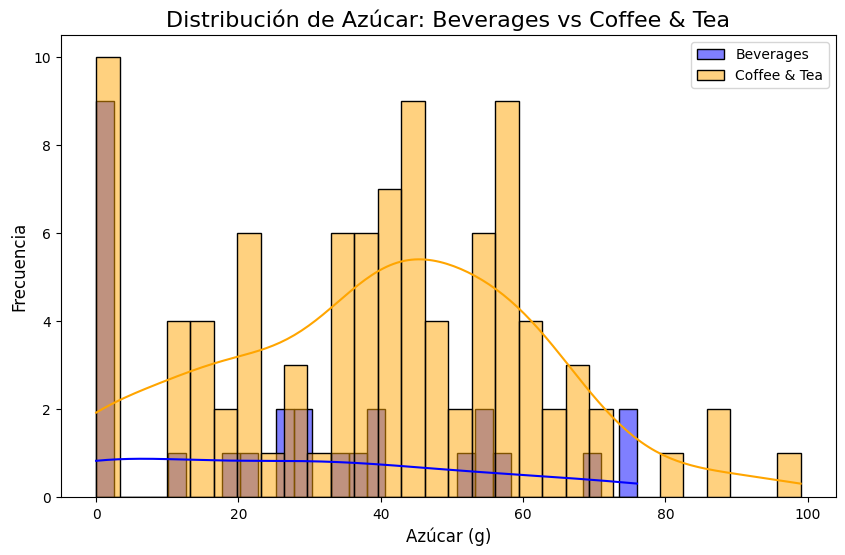

In [ ]:
# 3
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar las categorías 'beverages' y 'coffee & tea'
df_beverages = df_combinado[df_combinado['Category'] == 'beverages']
df_coffee_tea = df_combinado[df_combinado['Category'] == 'coffee & tea']

# Gráficos de distribuciones para 'Sugars'
plt.figure(figsize=(10, 6))
sns.histplot(df_beverages['Sugars'], kde=True, color='blue', label='Beverages', bins=30)
sns.histplot(df_coffee_tea['Sugars'], kde=True, color='orange', label='Coffee & Tea', bins=30)
plt.title('Distribución de Azúcar: Beverages vs Coffee & Tea', fontsize=16)
plt.xlabel('Azúcar (g)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()
plt.show()


In [ ]:
# Test de normalidad para azúcar
stat_beverages_sugar, p_beverages_sugar = shapiro(df_beverages['Sugars'].dropna())
stat_coffee_sugar, p_coffee_sugar = shapiro(df_coffee_tea['Sugars'].dropna())

# Mostrar resultados de normalidad
print("Test de normalidad para azúcar:")
print(f"Beverages - Estadístico: {stat_beverages_sugar}, P-valor: {p_beverages_sugar}")
print(f"Coffee & Tea - Estadístico: {stat_coffee_sugar}, P-valor: {p_coffee_sugar}")


Test de normalidad para azúcar:
Beverages - Estadístico: 0.8911349159759543, P-valor: 0.00843330950460786
Coffee & Tea - Estadístico: 0.9726825399959329, P-valor: 0.04412504733456115


Dado que ambas distribuciones no son normales, utilizaremos una prueba no paramétrica para comparar las distribuciones. En este caso, Mann-Whitney test.

In [ ]:
from scipy.stats import mannwhitneyu

# Realizar la prueba de Mann-Whitney U para comparar las distribuciones de azúcar
stat_sugar, p_sugar = mannwhitneyu(df_beverages['Sugars'].dropna(), df_coffee_tea['Sugars'].dropna())

print("Resultados del Mann-Whitney U Test para Azúcar:")
print(f"Estadístico U: {stat_sugar}, P-valor: {p_sugar}")

if p_sugar < 0.05:
    print("Las distribuciones de azúcar entre 'beverages' y 'coffee & tea' son estadísticamente distintas (p < 0.05).")
else:
    print("No hay diferencias estadísticamente significativas en las distribuciones de azúcar (p ≥ 0.05).")

Resultados del Mann-Whitney U Test para Azúcar:
Estadístico U: 903.0, P-valor: 0.019260607140614512
Las distribuciones de azúcar entre 'beverages' y 'coffee & tea' son estadísticamente distintas (p < 0.05).


Los resultados del Mann-Whitney U Test indican que el valor de p = 0.0193, el cual es menor a 0.05. Esto significa que podemos afirmar que las distribuciones de azúcar son estadísticamente distintas entre las categorías 'beverages' y 'coffee & tea'.

Este hallazgo sugiere que el contenido de azúcar varía significativamente dependiendo de la categoría, lo cual puede ser útil para análisis o decisiones relacionadas con el menú o la salud.

4. Y la distribución de las calorías?

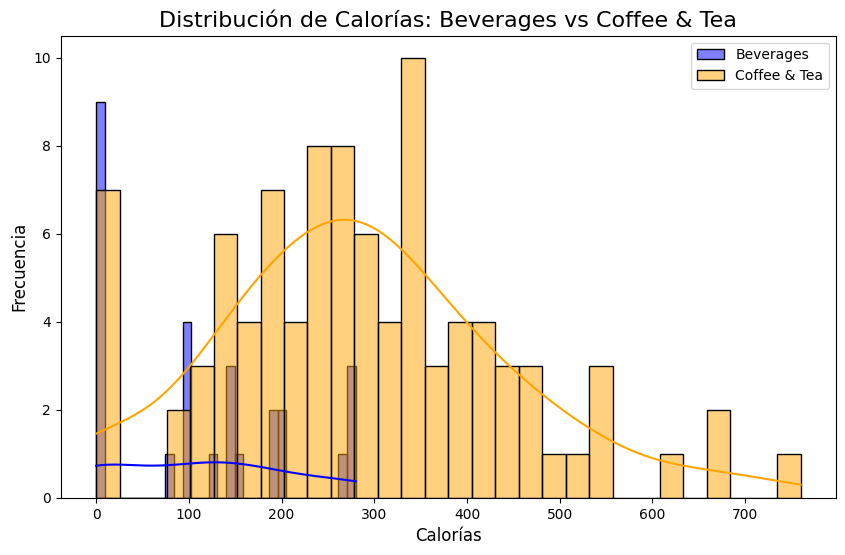

In [ ]:
# 4
# Gráficos de distribuciones para 'Calories'
plt.figure(figsize=(10, 6))
sns.histplot(df_beverages['Calories'], kde=True, color='blue', label='Beverages', bins=30)
sns.histplot(df_coffee_tea['Calories'], kde=True, color='orange', label='Coffee & Tea', bins=30)
plt.title('Distribución de Calorías: Beverages vs Coffee & Tea', fontsize=16)
plt.xlabel('Calorías', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()
plt.show()

In [ ]:
# Test de normalidad para calorías
stat_beverages_calories, p_beverages_calories = shapiro(df_beverages['Calories'].dropna())
stat_coffee_calories, p_coffee_calories = shapiro(df_coffee_tea['Calories'].dropna())

print("Test de normalidad para calorías:")
print(f"Beverages - Estadístico: {stat_beverages_calories}, P-valor: {p_beverages_calories}")
print(f"Coffee & Tea - Estadístico: {stat_coffee_calories}, P-valor: {p_coffee_calories}")

Test de normalidad para calorías:
Beverages - Estadístico: 0.8796353709259792, P-valor: 0.004717525685918674
Coffee & Tea - Estadístico: 0.9748669443570142, P-valor: 0.0642130457550762


In [ ]:
# Realizar la prueba de Mann-Whitney U para comparar las distribuciones de calorias
stat_sugar, p_sugar = mannwhitneyu(df_beverages['Calories'].dropna(), df_coffee_tea['Calories'].dropna())

print("Resultados del Mann-Whitney U Test para Calorías:")
print(f"Estadístico U: {stat_sugar}, P-valor: {p_sugar}")

if p_sugar < 0.05:
    print("Las distribuciones de calorías entre 'beverages' y 'coffee & tea' son estadísticamente distintas (p < 0.05).")
else:
    print("No hay diferencias estadísticamente significativas en las distribuciones de calorías (p ≥ 0.05).")

Resultados del Mann-Whitney U Test para Calorías:
Estadístico U: 458.0, P-valor: 3.5922281485308865e-07
Las distribuciones de calorías entre 'beverages' y 'coffee & tea' son estadísticamente distintas (p < 0.05).


El Mann-Whitney U Test ha producido un p-valor = 3.59e-07, que es muchísimo menor que 0.05. Esto nos da evidencia clara para concluir que las distribuciones de calorías entre 'beverages' y 'coffee & tea' también son estadísticamente distintas


5. Discretizar la variable 'Sugars' en 4 valores mediante el método de los cuartíles.

Vamos a utlizar la función "pd.qcut" que divide los datos en intervalos de igual frecuencia (percentiles).

In [ ]:
# 5
# Discretizar la variable 'Sugars' en 4 cuartiles
df_combinado['Sugars_category'] = pd.qcut(df_combinado['Sugars'], q=4, labels=['Muy Bajo', 'Bajo', 'Alto', 'Muy Alto'])

# Mostrar los primeros valores
print(df_combinado[['Sugars', 'Sugars_category']].head())


   Sugars Sugars_category
0    14.0            Bajo
1     7.0            Bajo
2     9.0            Bajo
3     7.0            Bajo
4     7.0            Bajo


6. Obtener las tablas de frecuencia de las variables categóricas incluida la creada en el apartado anterior (Sugars_category).

In [ ]:
# 6
# Crear tablas de frecuencia para todas las variables categóricas
for columna in df_combinado.select_dtypes(include=['object', 'category']).columns:
    print(f"Tabla de frecuencia para la variable '{columna}':")
    print(df_combinado[columna].value_counts())
    print("\n")


Tabla de frecuencia para la variable 'Category':
Category
coffee & tea          104
breakfast              42
smoothies & shakes     28
chicken & fish         27
beverages              27
beef & pork            15
snacks & sides         13
desserts                7
salads                  5
Name: count, dtype: int64


Tabla de frecuencia para la variable 'Item':
Item
small french fries                           1
bacon clubhouse burger                       1
bacon mcdouble                               1
big mac                                      1
cheeseburger                                 1
                                            ..
coca-cola classic (child)                    1
1% low fat milk jug                          1
quarter pounder with cheese                  1
quarter pounder with bacon habanero ranch    1
quarter pounder with bacon & cheese          1
Name: count, Length: 268, dtype: int64


Tabla de frecuencia para la variable 'Stars':
Stars
5 stars    50
3 star

7. Obtener el diagrama de frecuencias de las variables categóricas (sin incluir 'Item').

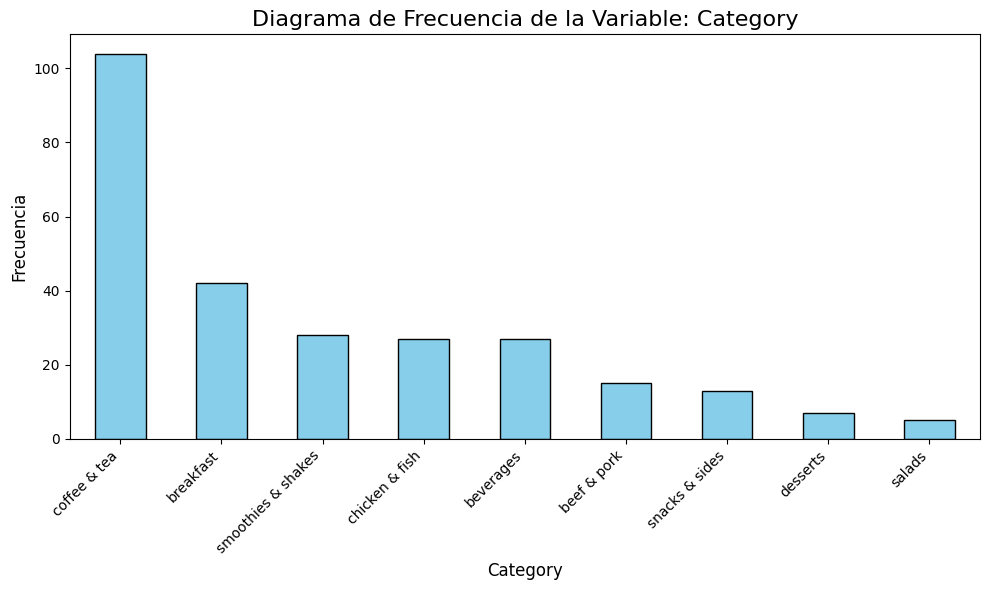

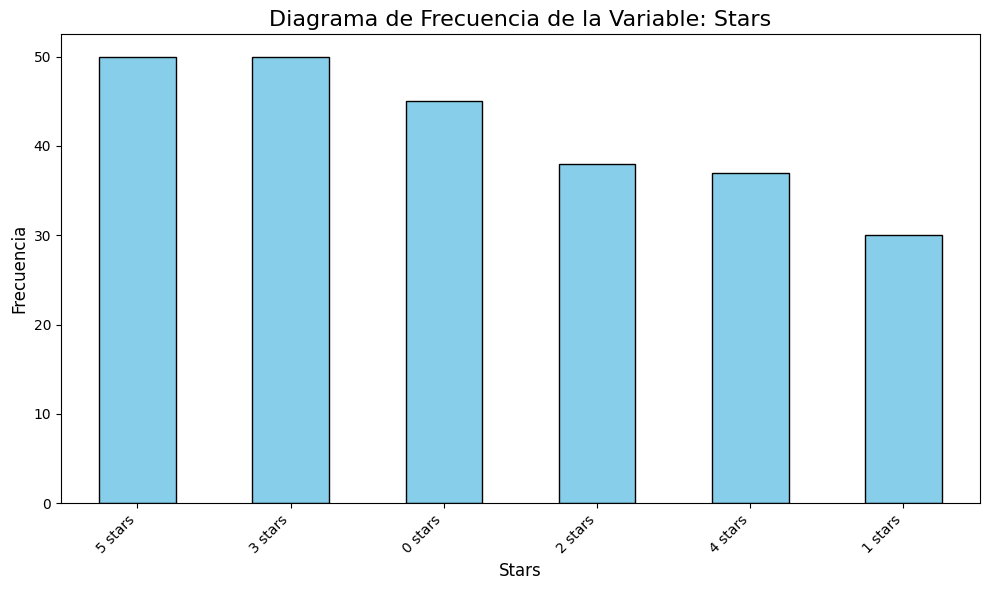

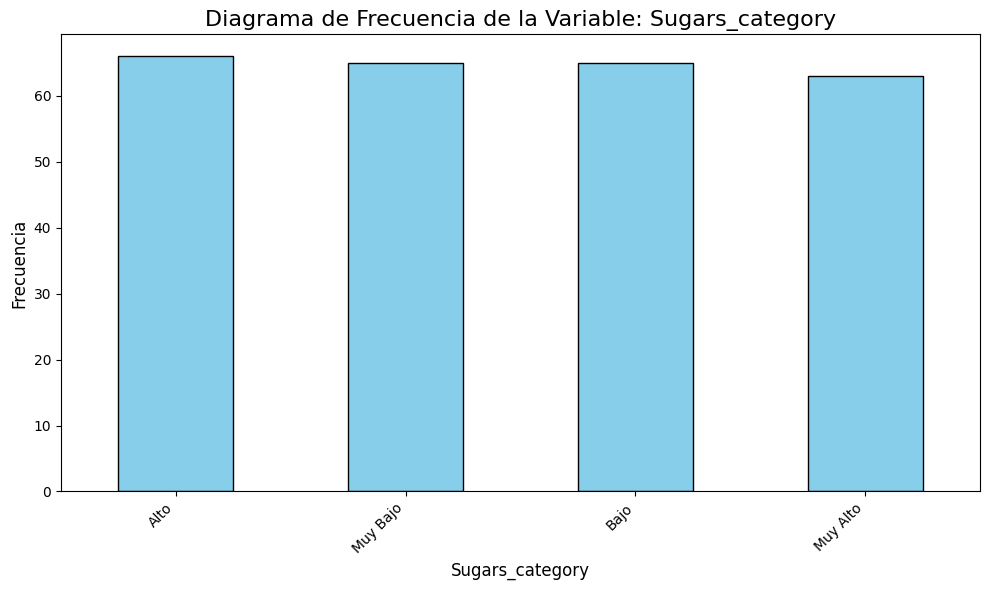

In [ ]:
# 7
# Seleccionar variables categóricas excluyendo 'Item'
categorical_columns = df_combinado.select_dtypes(include=['object', 'category']).columns
categorical_columns = categorical_columns.drop('Item')  # Excluir 'Item'

# Generar gráficos de frecuencias para cada variable categórica
for columna in categorical_columns:
    plt.figure(figsize=(10, 6))
    df_combinado[columna].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Diagrama de Frecuencia de la Variable: {columna}', fontsize=16)
    plt.xlabel(columna, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()  # Ajustar diseño para mejor visualización
    plt.show()

8. Obtener la tabla de contingencia entre 'Category' y la variable discretizada de las Sugars_category.

Para obtener la tabla de contingencia, vamos a utilizar la funcion `crosstab()` en Pandas, con ello obtendremos una tabla cruzada que nos permitirá ver la distribución de frecuencia de entre las variables categoricas que se indican en las siguientes lineas de codigo:



In [ ]:
# 8
tabla_contingencia = pd.crosstab(index = df_combinado['Category'],
                                 columns = df_combinado['Sugars_category'])
tabla_contingencia

Sugars_category,Muy Bajo,Bajo,Alto,Muy Alto
Category,,,,
beef & pork,0,15,0,0
beverages,9,1,10,7
breakfast,25,13,4,0
chicken & fish,8,19,0,0
coffee & tea,10,9,44,32
desserts,0,4,3,0
salads,3,2,0,0
smoothies & shakes,0,0,4,24
snacks & sides,10,2,1,0


9. La diferencia de azucar entre los ítems de 'Beef&Pork' y "Chicken and fish' es estadísticamente distinta?  

In [ ]:
# 9
# Filtrar solo los ítems de las dos categorías que nos interesan
Beef_Pork = df_combinado[df_combinado['Category'] == 'beef & pork']['Sugars']
Chicken_and_fish = df_combinado[df_combinado['Category'] == 'chicken & fish']['Sugars']


# Test de normalidad para azúcar
stat_BeefPork_sugar, p_BeefPork_sugar = shapiro(Beef_Pork.dropna())
stat_ChickenFish_sugar, p_ChickenFish_sugar = shapiro(Chicken_and_fish.dropna())

# Mostrar resultados de normalidad
print("Test de normalidad para azúcar:")
print(f"beef & pork - Estadístico: {stat_BeefPork_sugar}, P-valor: {p_BeefPork_sugar}")
print(f"chicken & fish - Estadístico: {stat_ChickenFish_sugar}, P-valor: {p_ChickenFish_sugar}")

Test de normalidad para azúcar:
beef & pork - Estadístico: 0.9048637368490864, P-valor: 0.11295833836084884
chicken & fish - Estadístico: 0.951702521741762, P-valor: 0.23572604481767828


Dado que ambas distribuciones son normales (P-value > 0.05), el test adecuado para comparar estas distribuciones será la prueba **t Student**.

In [ ]:
from scipy.stats import ttest_ind

# Prueba t de Student para comparar las distribuciones de azúcar
stat_sugar, p_sugar = ttest_ind(Beef_Pork.dropna(), Chicken_and_fish.dropna())

# Mostrar resultados
print("Resultados del t-test para Azúcar:")
print(f"Estadístico t: {stat_sugar}, P-valor: {p_sugar}")

if p_sugar < 0.05:
    print("Las distribuciones de azúcar entre 'Beef&Pork' y 'Chicken and Fish' son estadísticamente distintas (p < 0.05).")
else:
    print("No hay diferencias estadísticamente significativas en las distribuciones de azúcar (p ≥ 0.05).")


Resultados del t-test para Azúcar:
Estadístico t: 1.163983148339513, P-valor: 0.2513268573204086
No hay diferencias estadísticamente significativas en las distribuciones de azúcar (p ≥ 0.05).


El p-valor = 0.2513 confirma que no hay diferencias estadísticamente significativas en las distribuciones de azúcar entre 'Beef&Pork' y 'Chicken and Fish'. Esto significa que, con base en los datos disponibles, las dos categorías no muestran una discrepancia notable en el contenido de azúcar.


10. La diferencia de calorías entre los ítems de 'Beef&Pork' y "Chicken and fish' es estadísticamente distinta?

In [ ]:
# 10
# Filtrar solo los ítems de las dos categorías que nos interesan
Beef_Pork = df_combinado[df_combinado['Category'] == 'beef & pork']['Calories']
Chicken_and_fish = df_combinado[df_combinado['Category'] == 'chicken & fish']['Calories']


# Test de normalidad para Calorias
stat_BeefPork_calories, p_BeefPork_calories = shapiro(Beef_Pork.dropna())
stat_ChickenFish_calories, p_ChickenFish_calories = shapiro(Chicken_and_fish.dropna())

# Mostrar resultados de normalidad
print("Test de normalidad para calorias:")
print(f"beef & pork - Estadístico: {stat_BeefPork_calories}, P-valor: {p_BeefPork_calories}")
print(f"chicken & fish - Estadístico: {stat_ChickenFish_calories}, P-valor: {p_ChickenFish_calories}")

Test de normalidad para calorias:
beef & pork - Estadístico: 0.9714814432252455, P-valor: 0.8793575464609893
chicken & fish - Estadístico: 0.6641229708877092, P-valor: 1.2761811696569936e-06


Como una de las distribuciones no sigue un distribución normal (la de Chicken and Fish) y estamos comparando dos grupos independientes, el test adecuado para comparar las dos es del de Mann-Whitney.

In [ ]:
# Prueba Mann-Whitney U para calorías
stat_calories, p_calories = mannwhitneyu(Beef_Pork.dropna(), Chicken_and_fish.dropna())

# Mostrar resultados
print("Resultados del Mann-Whitney U Test para Calorías:")
print(f"Estadístico U: {stat_calories}, P-valor: {p_calories}")

if p_calories < 0.05:
    print("Las distribuciones de calorías entre 'Beef & Pork' y 'Chicken & Fish' son estadísticamente distintas (p < 0.05).")
else:
    print("No hay diferencias estadísticamente significativas en las distribuciones de calorías (p ≥ 0.05).")


Resultados del Mann-Whitney U Test para Calorías:
Estadístico U: 194.0, P-valor: 0.8334482617987502
No hay diferencias estadísticamente significativas en las distribuciones de calorías (p ≥ 0.05).


El p-valor obtenido (0.8334) es considerablemente mayor que 0.05, lo que confirma que no hay diferencias estadísticamente significativas entre las distribuciones de calorías en las categorías 'Beef&Pork' y 'Chicken and Fish'. Esto implica que, según los datos analizados, ambas categorías tienen un patrón de calorías similar.


11. El factor categoría afecta en el valor de las calorias (análisis completo)?  

Queremos analizar si las calorías varían significativamente entre las diferentes categorías (Category). Dado que Category es una variable categórica y Calories es numérica, empezaremos verificando la normilidad de la variable dependiente (Calories).


In [ ]:
# 11
# Realizar test de normalidad para cada categoría
categorias = df_combinado['Category'].unique()
resultados_normalidad = {}

for categoria in categorias:
    calorias = df_combinado[df_combinado['Category'] == categoria]['Calories'].dropna()
    stat, p = shapiro(calorias)
    resultados_normalidad[categoria] = (stat, p)

# Mostrar resultados
print("Resultados del test de normalidad (Shapiro-Wilk):")
for categoria, (stat, p) in resultados_normalidad.items():
    print(f"{categoria} - Estadístico: {stat}, P-valor: {p}")

Resultados del test de normalidad (Shapiro-Wilk):
beef & pork - Estadístico: 0.9714814432252455, P-valor: 0.8793575464609893
beverages - Estadístico: 0.8796353709259792, P-valor: 0.004717525685918674
breakfast - Estadístico: 0.8821200786773999, P-valor: 0.00043806915772839997
chicken & fish - Estadístico: 0.6641229708877092, P-valor: 1.2761811696569936e-06
coffee & tea - Estadístico: 0.9748669443570142, P-valor: 0.0642130457550762
desserts - Estadístico: 0.9298485550467437, P-valor: 0.5496122704594194
salads - Estadístico: 0.8631974180317442, P-valor: 0.2399572766973574
smoothies & shakes - Estadístico: 0.9253961991863995, P-valor: 0.04724163607439484
snacks & sides - Estadístico: 0.9505721397373028, P-valor: 0.6069847068279614


Dado que algunas categorías tienen distribuciones no normales, utilizaremos el test de Fligner-Killeen, que se trata de la alternativa no paramétrica para evaluar la homogeneidad de las varianzas cuando los datos no cumplen con la condición de normalidad.


In [ ]:
from scipy.stats import fligner

# Aplicar el test de Fligner-Killeen
stat_fligner, p_fligner = fligner(*[df_combinado[df_combinado['Category'] == categoria]['Calories'].dropna() for categoria in categorias])

# Mostrar resultados
print("Resultados del test de Fligner-Killeen para homogeneidad de varianzas:")
print(f"Estadístico: {stat_fligner}, P-valor: {p_fligner}")

if p_fligner > 0.05:
    print("Las varianzas son homogéneas entre categorías (p > 0.05).")
else:
    print("Las varianzas NO son homogéneas entre categorías (p ≤ 0.05).")

Resultados del test de Fligner-Killeen para homogeneidad de varianzas:
Estadístico: 22.091635627956666, P-valor: 0.0047489111078008505
Las varianzas NO son homogéneas entre categorías (p ≤ 0.05).


Como nose cumple el supuesto de normalidad y las varianzas no son homegeneas, aplicaremos el test Kruskal-Walli, la alternativa no paramétrica al ANOVA.


In [ ]:
from scipy.stats import kruskal

# Realizar prueba Kruskal-Wallis
stat_kruskal, p_kruskal = kruskal(*[df_combinado[df_combinado['Category'] == categoria]['Calories'].dropna() for categoria in categorias])

print("\nResultados del test Kruskal-Wallis:")
print(f"Estadístico H: {stat_kruskal}, P-valor: {p_kruskal}")

if p_kruskal < 0.05:
    print("Las calorías difieren significativamente entre categorías (p < 0.05).")
else:
    print("No hay diferencias significativas entre categorías (p ≥ 0.05).")


Resultados del test Kruskal-Wallis:
Estadístico H: 119.62679889016032, P-valor: 3.9588885997386056e-22
Las calorías difieren significativamente entre categorías (p < 0.05).


El resultado del Kruskal-Wallis muestra un p-valor extremadamente bajo (p = 3.96e-22), lo que confirma que las calorías varían significativamente entre las categorías. El alto valor del estadístico H = 119.63 respalda esta conclusión, indicando diferencias sustanciales en las distribuciones de calorías entre los grupos.


12. Obtener el gráfico box-plot en el que se adviertan como se distribuyen los valores de calorías por category.

<ipython-input-137-3bca8e88b299>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combinado, x='Category', y='Calories', palette='Set3')


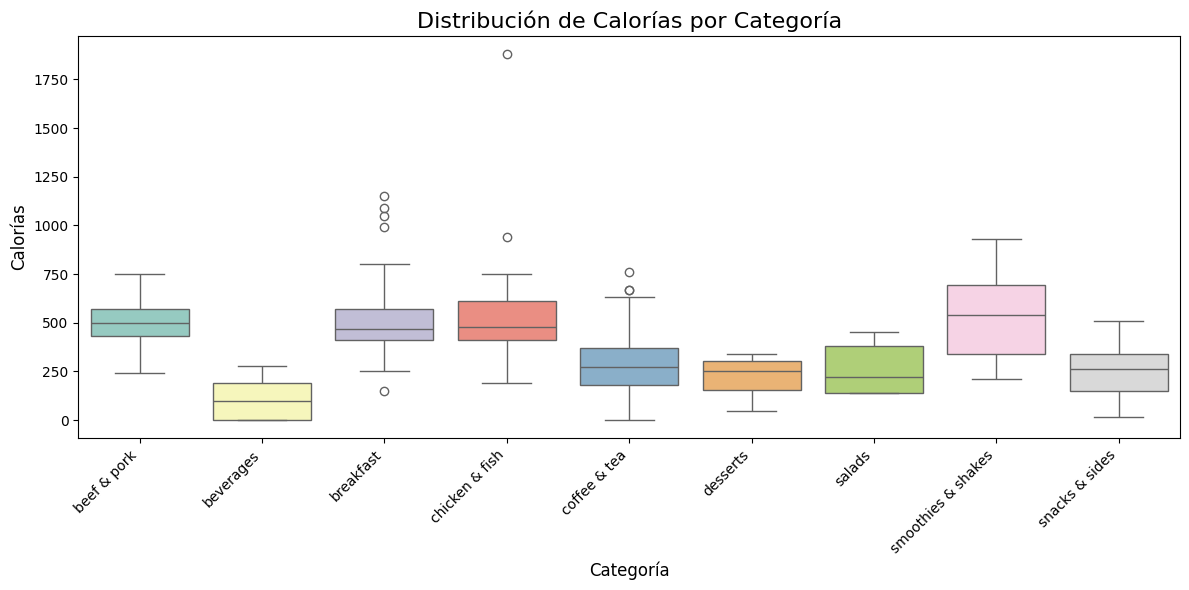

In [ ]:
# 12

# Configurar tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crear el box-plot con seaborn
sns.boxplot(data=df_combinado, x='Category', y='Calories', palette='Set3')

# Personalizar el gráfico
plt.title('Distribución de Calorías por Categoría', fontsize=16)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Calorías', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor legibilidad
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Interpretacion y análisis del Box Plot:

+ Mediana (línea horizontal dentro de la caja):

  Es el valor central de las calorías en cada categoría.
  
  Por ejemplo, beef & pork, chicken & fish y smoothies & shakes tienen medianas altas, lo que nos indica que estas categorías tienen más calóricas.

+ Tamaño de la caja (IQR - rango intercuartílico):

  Refleja la dispersión del 50% central de los datos.
  
  Por ejemplo, salads y beverages tienen cajas más pequeñas, datos más concentrados. Por lo contrario, Smoothies & shakes y breakfast tienen cajas más grandes, más variabilidad.

+ Bigotes (whiskers):

  Nos dicen hasta dónde llegan los valores “normales”.
  
  En beverages, los valores se concentran entre 0 y 250 cal, mientras que en smoothies & shakes se extienden bastante, sugiere que hay ítems muy variables.

+ Outliers (puntos individuales):

  Muestran valores atípicos (más allá de 1.5 × IQR).

  En breakfast, chicken & fish, coffee & tea y smoothies hay varios outliers, puede ser porque el dataframe tiene ítems mucho más calóricos que la media.
  
  Un dato que destaca, es en la categoría Chicken & fish, con un valor que llega a 1800 cal


### **Parte C.** **Información y Visualizaciones**:

1. ¿Cuantas calorias supone comer la opción con **menos** calorias de la categoría 'breakfast' y de la categoría 'desserts'?

In [ ]:
# 1
# Filtrar las categorías 'breakfast' y 'desserts'
breakfast_min_calories = df_combinado[df_combinado['Category'] == 'breakfast']['Calories'].min()
desserts_min_calories = df_combinado[df_combinado['Category'] == 'desserts']['Calories'].min()

# Mostrar los resultados
print(f"La opción con menos calorías en 'breakfast' tiene: {breakfast_min_calories} calorías.")
print(f"La opción con menos calorías en 'desserts' tiene: {desserts_min_calories} calorías.")

La opción con menos calorías en 'breakfast' tiene: 150.0 calorías.
La opción con menos calorías en 'desserts' tiene: 45.0 calorías.


2. ¿De qué items estaríamos hablando?

In [ ]:
# 2
# Filtrar los ítems con menos calorías en cada categoría
breakfast_min_item = df_combinado[df_combinado['Category'] == 'breakfast'].nsmallest(1, 'Calories')
desserts_min_item = df_combinado[df_combinado['Category'] == 'desserts'].nsmallest(1, 'Calories')

# Mostrar los resultados
print("Ítem con menos calorías en 'breakfast':")
print(breakfast_min_item[['Item', 'Calories']])

print("\nÍtem con menos calorías en 'desserts':")
print(desserts_min_item[['Item', 'Calories']])

Ítem con menos calorías en 'breakfast':
          Item  Calories
63  hash brown     150.0

Ítem con menos calorías en 'desserts':
                    Item  Calories
219  kids ice cream cone      45.0


3. ¿Cuáles son los 15 ítems con más azúcar?  

In [ ]:
# 3
# Obtener los 15 ítems con más azúcar
top_sugar_items = df_combinado.nlargest(15, 'Sugars')

# Mostrar los resultados
print("Los 15 ítems con más azúcar:")
print(top_sugar_items[['Item', 'Sugars']])


Los 15 ítems con más azúcar:
                                                  Item  Sugars
236               mcflurry with m&m’s candies (medium)   128.0
249                           strawberry shake (large)   123.0
230                            chocolate shake (large)   120.0
244                             shamrock shake (large)   115.0
242  mcflurry with reese's peanut butter cups (medium)   103.0
252                              vanilla shake (large)   101.0
250                          strawberry shake (medium)   100.0
135                      frappé chocolate chip (large)    99.0
231                           chocolate shake (medium)    97.0
245                            shamrock shake (medium)    93.0
237                mcflurry with m&m’s candies (small)    89.0
132                             frappé caramel (large)    88.0
138                               frappé mocha (large)    88.0
239                mcflurry with oreo cookies (medium)    85.0
136                     fr

4. Representa en un diagrama de barras la cantidad de azúcar de estos 15 items, ordenadas de mayor a menor.

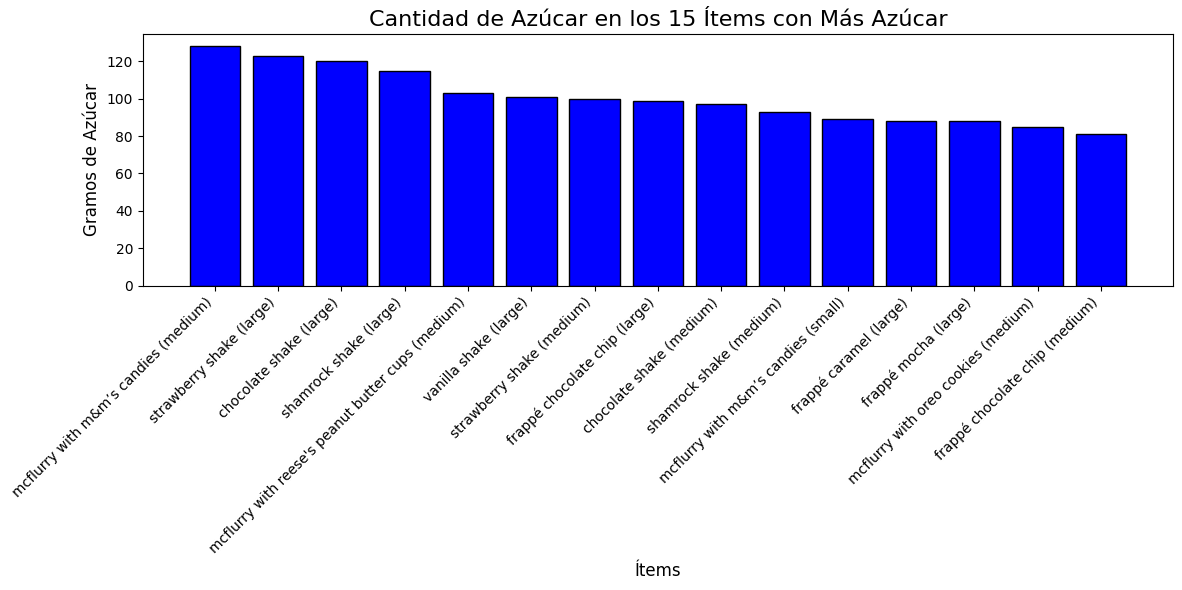

In [ ]:
# 4
# Ordenar los ítems por cantidad de azúcar (mayor a menor)
top_sugar_items = df_combinado.nlargest(15, 'Sugars').sort_values(by='Sugars', ascending=False)

# Crear el diagrama de barras
plt.figure(figsize=(12, 6))
plt.bar(top_sugar_items['Item'], top_sugar_items['Sugars'], color='blue', edgecolor='black')

# Etiquetas del grafico
plt.title('Cantidad de Azúcar en los 15 Ítems con Más Azúcar', fontsize=16)
plt.xlabel('Ítems', fontsize=12)
plt.ylabel('Gramos de Azúcar', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

5. ¿Qué categoría presenta en media más estrellas (stars)?  

Representacion en un mismo gráfico:  

1) Diagrama de barras del número medio de reviews por categoria  
2) Plot lineas con el número médio de estrellas.  


**TIP**: https://www.analyticslane.com/2022/08/04/uso-de-multiples-ejes-en-matplotlib/

In [ ]:
# 5
# Convertir 'Stars' en numérica eliminando texto
df_combinado['Stars'] = df_combinado['Stars'].str.extract('(\d+)').astype(float)

# Verificar la transformación
print(df_combinado[['Stars']].head())

   Stars
0    1.0
1    0.0
2    0.0
3    3.0
4    3.0


6. Crea un dataframe que muestre para cada categoria una columna con el ítem con más colesterol y el ítem con menos colesterol. Este dataframe tendrá tres columnas: [Categoría, item_max_cholesterol, item_min_cholesterol]

In [ ]:
# 6
# Crear un DataFrame con el ítem de máximo y mínimo colesterol por categoría
cholesterol_df = df_combinado.groupby('Category').apply(
    lambda group: pd.Series({
        'item_max_cholesterol': group.loc[group['Cholesterol'].idxmax(), 'Item'],
        'item_min_cholesterol': group.loc[group['Cholesterol'].idxmin(), 'Item']
    })
).reset_index()

# Mostrar el resultado
print(cholesterol_df)

             Category                            item_max_cholesterol  \
0         beef & pork              double quarter pounder with cheese   
1           beverages                             1% low fat milk jug   
2           breakfast     big breakfast with hotcakes (large biscuit)   
3      chicken & fish                    chicken mcnuggets (40 piece)   
4        coffee & tea                          frappé caramel (large)   
5            desserts                              hot caramel sundae   
6              salads  premium bacon ranch salad with grilled chicken   
7  smoothies & shakes                          shamrock shake (large)   
8      snacks & sides      honey mustard snack wrap (grilled chicken)   

                        item_min_cholesterol  
0                                  hamburger  
1                  coca-cola classic (child)  
2                                 hash brown  
3                chicken mcnuggets (4 piece)  
4                             coff

<ipython-input-143-f6021d596863>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cholesterol_df = df_combinado.groupby('Category').apply(


**7. Análisis de variables**

7.1. Crea un grafico tipo scatterplot para representar la relación entre Calorías vs Azúcar.

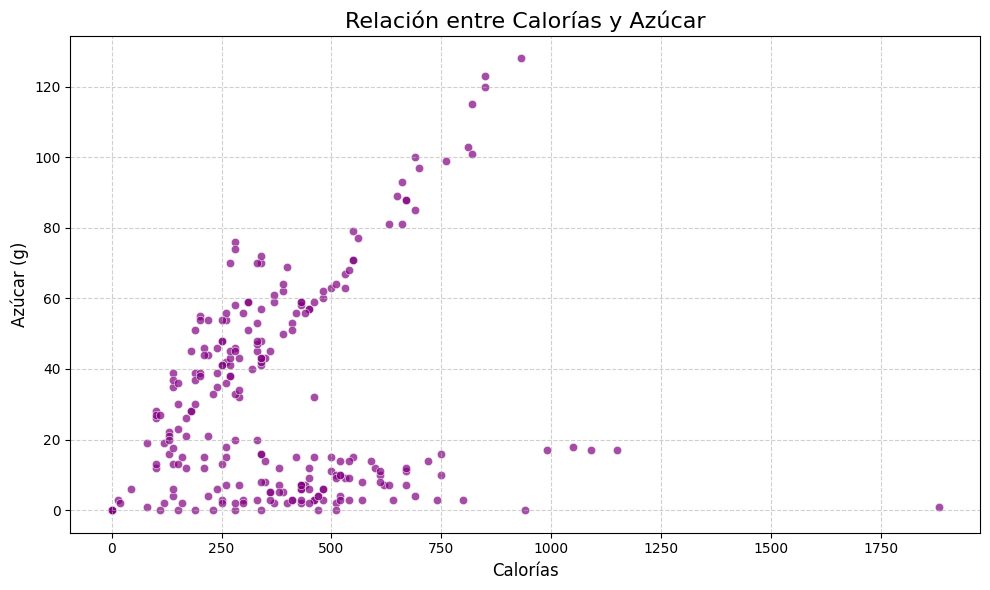

In [ ]:
# 7.1
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el scatterplot
sns.scatterplot(data=df_combinado, x='Calories', y='Sugars', color='purple', alpha=0.7)

# Etiquetas del gráfico
plt.title('Relación entre Calorías y Azúcar', fontsize=16)
plt.xlabel('Calorías', fontsize=12)
plt.ylabel('Azúcar (g)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

7.2 Tendencia e interpretacion del grafico

En el grafico se observa que en general parece haber un tendencia de que los items con más calorias tienen también un mayor contenido de azúcar. Aunque hay una relación positiva, también podemos observar una dispersión significativa especialmente en niveles medios de calorias, esto sugiere que algunos items con valores calóricos similares, varian bastante en su contenido en azúcares.

7.3 Gráfico diferenciando por colores los valores correspondientes a cada categoría.  

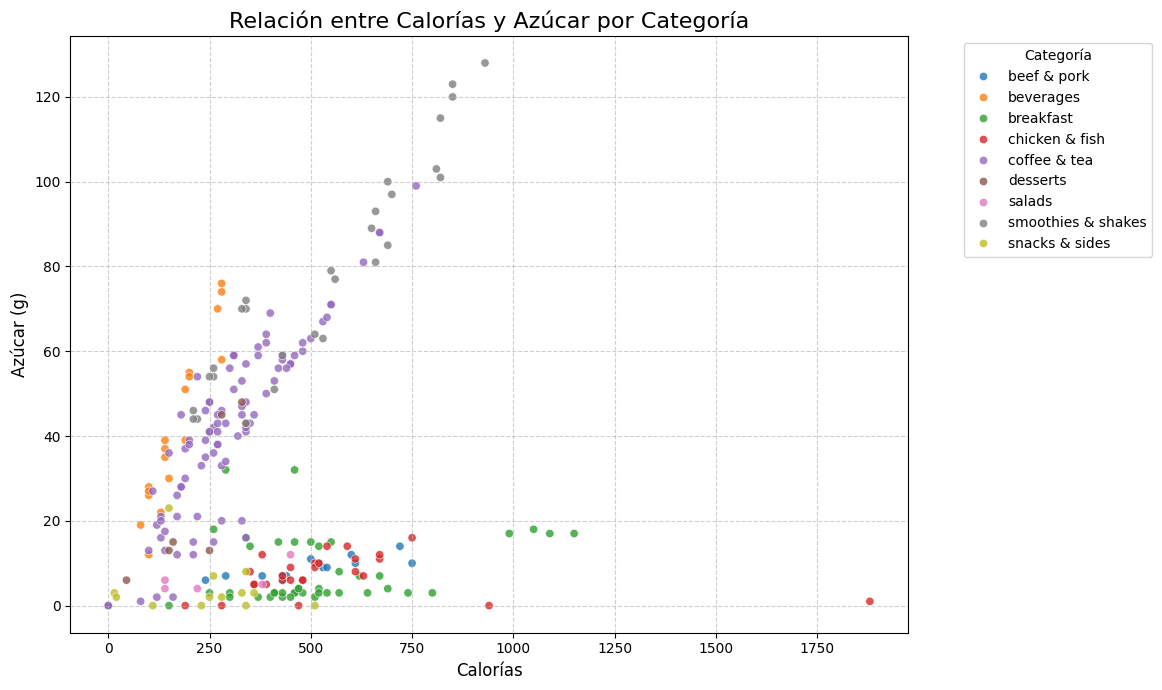

In [ ]:
# 7.3
# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 7))

# Crear el scatterplot diferenciando por categoría
sns.scatterplot(data=df_combinado, x='Calories', y='Sugars', hue='Category', palette='tab10', alpha=0.8)

plt.title('Relación entre Calorías y Azúcar por Categoría', fontsize=16)
plt.xlabel('Calorías', fontsize=12)
plt.ylabel('Azúcar (g)', fontsize=12)
plt.legend(title='Categoría', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

7.4 Tendencias e interpretacion de los datos obtenidos

En el grafico podemos observar como las distintas categorías tienenden a agruparse por valores similares entre calorías y azúcares. Tambíen destacan categorías como "Coffe & tea", "smoothies & shakes" y "berverages" que teniendo una cantidad de calorías similares en cada categoría, presentan distintos niveles de azúcares, lo que puede ser devido a las distintas variedades dentro de cada categoría.

Por otro lado, el resto de categorías parecen tener una relación más contenida entre calorías y azúcares. En estas categorías como "beef & pork", "chicken & fish", "salads" o "snacks & sides", la variabilidad de azúcar es mucho menor incluso cuando las calorías pueden aumentar. Esto podría indicar que, en estos casos, las calorías provienen mayoritariamente de otros macronutrientes como grasas o proteínas, y no del azúcar.

7.5.Gráfico para las variables Protein y Total Fat.  

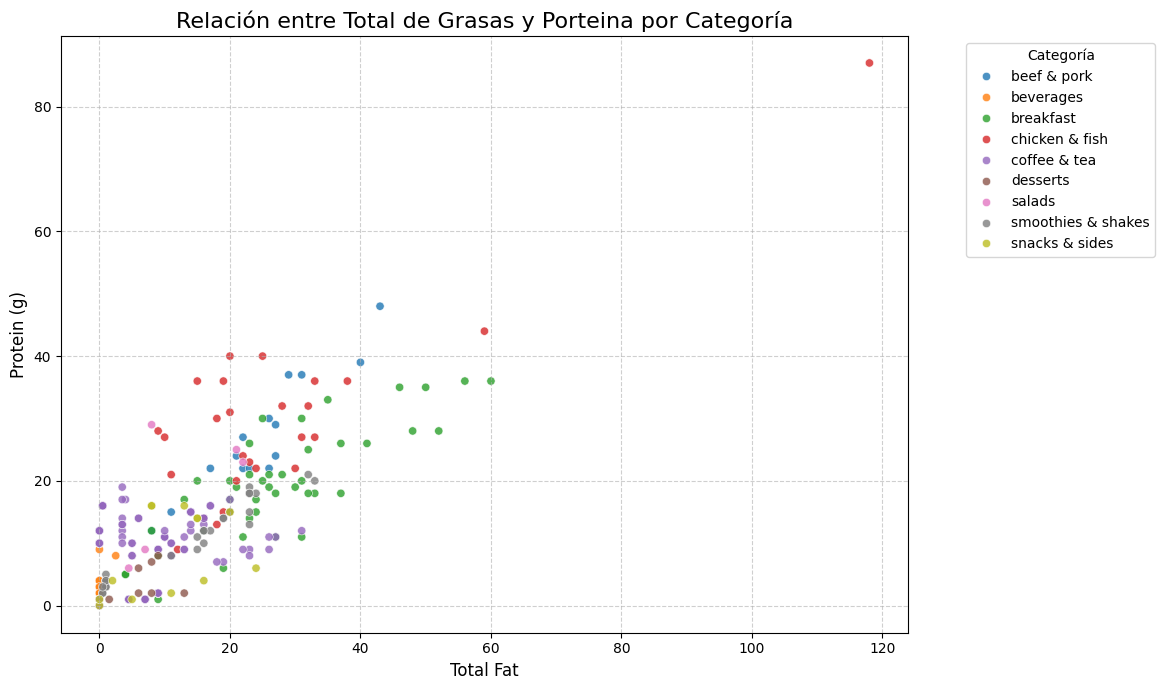

In [ ]:
# 7.5
# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 7))

# Crear el scatterplot diferenciando por categoría
sns.scatterplot(data=df_combinado, x='Total Fat', y='Protein', hue='Category', palette='tab10', alpha=0.8)

plt.title('Relación entre Total de Grasas y Porteina por Categoría', fontsize=16)
plt.xlabel('Total Fat', fontsize=12)
plt.ylabel('Protein (g)', fontsize=12)
plt.legend(title='Categoría', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

7.6. Relaciones que se observan en el grafico e interpretacion de los datos.

En el grafico, observamos que a rasgos generales, hay una tendencia positiva, a medida que aumenta el contenido de grasa, tamíen tiende a incrementar el contenido en proteínas.

Un dato que destaca, es para la categoría "coffee & tea", en el que se aprecian valores con muy bajo nivel de grasa pero en proporcion una mayor cantidad de proteinas, lo mismo sucede para algunos valores de la categoría "chicken & fish", destacando un valor extremo con 120 gramos de grasa y más de 80 gramos de proteínas, como ya hemos visto en anteriores graficos para esta categoría hay un item que destaca del resto.

Las otras categorías muestran una mayor consistencia y menos variabilidad en la relación grasa-proteína. Esto podría reflejar que los ítems en esas categorías están diseñados con perfiles nutricionales más equilibrados

## Practico 2


En esta parte vamos a trabajar con datos registrado desde el servicio de Taxi de New York. En concreto de los icónicos taxis de color amarillo de la Gran Manzana.

Con este dataset, además de limpiar y preparar los datos, plantearemos qué tipo de problema (regresión o clasificación) podríamos resolver con este dataset preparado.


### **Parte A.** Para realizar la **limpieza y preparación de los datos**, se solicita:

In [ ]:
import pandas as pd
import numpy as np
import re
import datetime

#Representaciones gráficas
import matplotlib.pyplot as plt
#plt.style.use('seaborn')
import seaborn as sns

# Estadísticas
from scipy import stats

# Modelos de Aprendizaje
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression, LogisticRegression


1.a. Carga el fichero de formato .csv -> text+_zone_lookup y mostrar los primeros 10 registros

In [ ]:
# 1.a.
from google.colab import files
# cargamos el fichero
uploaded = files.upload()

Saving taxi+_zone_lookup.csv to taxi+_zone_lookup.csv


In [ ]:
# leemos el documento csv
df_taxi = pd.read_csv('taxi+_zone_lookup.csv')
df_taxi.head(10)

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
5,6,Staten Island,Arrochar/Fort Wadsworth,Boro Zone
6,7,Queens,Astoria,Boro Zone
7,8,Queens,Astoria Park,Boro Zone
8,9,Queens,Auburndale,Boro Zone
9,10,Queens,Baisley Park,Boro Zone


1.b. Carga el fichero de formato .parquet -> yellow_tripdata_2023-01 y mostrar los primeros 10 registros

In [ ]:
# 1.b
# cargamos el fichero
uploaded = files.upload()

Saving yellow_tripdata_2023-01.parquet to yellow_tripdata_2023-01.parquet


In [ ]:
df_yellow = pd.read_parquet('yellow_tripdata_2023-01.parquet')
df_yellow.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00
5,2,2023-01-01 00:50:34,2023-01-01 01:02:52,1.0,1.84,1.0,N,161,137,1,12.8,1.00,0.5,10.00,0.0,1.0,27.80,2.5,0.00
6,2,2023-01-01 00:09:22,2023-01-01 00:19:49,1.0,1.66,1.0,N,239,143,1,12.1,1.00,0.5,3.42,0.0,1.0,20.52,2.5,0.00
7,2,2023-01-01 00:27:12,2023-01-01 00:49:56,1.0,11.70,1.0,N,142,200,1,45.7,1.00,0.5,10.74,3.0,1.0,64.44,2.5,0.00
8,2,2023-01-01 00:21:44,2023-01-01 00:36:40,1.0,2.95,1.0,N,164,236,1,17.7,1.00,0.5,5.68,0.0,1.0,28.38,2.5,0.00
9,2,2023-01-01 00:39:42,2023-01-01 00:50:36,1.0,3.01,1.0,N,141,107,2,14.9,1.00,0.5,0.00,0.0,1.0,19.90,2.5,0.00


2.a. El dataset contine el detalle de los LocationID que se representan en el dataset como PULocationID y DOLocatioID por lo que combinamos ambos datasets para que obtener el detalle del punto de recogida y destino.

In [ ]:
# 2.a
# Combinar para añadir los detalles del punto de recogida
df_combined2 = df_yellow.merge(df_taxi, how='left', left_on='PULocationID', right_on='LocationID')

# Combinar para añadir los detalles del punto de destino
df_combined2 = df_combined2.merge(df_taxi, how='left', left_on='DOLocationID', right_on='LocationID', suffixes=('_PU', '_DO'))

# Mostrar los 10 primeros registros después de combinar
print(df_combined2.head(10))

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   
5         2  2023-01-01 00:50:34   2023-01-01 01:02:52              1.0   
6         2  2023-01-01 00:09:22   2023-01-01 00:19:49              1.0   
7         2  2023-01-01 00:27:12   2023-01-01 00:49:56              1.0   
8         2  2023-01-01 00:21:44   2023-01-01 00:36:40              1.0   
9         2  2023-01-01 00:39:42   2023-01-01 00:50:36              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10

2.b. Renombrar las columnas de la siguiente forma y mostrar los 10 primeros registros

- Borough_x como PUBorough
- Zone_x como PUZone
- service_zone_x como PUService_zone

- Borough_y como DOBorough
- Zone_y como DOZone
- service_zone_y como DOService_zone

In [ ]:
# 2.b
# Renombrar columnas
df_combined2.rename(columns={
    'Borough_PU': 'PUBorough',
    'Zone_PU': 'PUZone',
    'service_zone_PU': 'PUService_zone',
    'Borough_DO': 'DOBorough',
    'Zone_DO': 'DOZone',
    'service_zone_DO': 'DOService_zone'
}, inplace=True)

# Mostrar los 10 primeros registros después de renombrar
print(df_combined2.head(10))


   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   
5         2  2023-01-01 00:50:34   2023-01-01 01:02:52              1.0   
6         2  2023-01-01 00:09:22   2023-01-01 00:19:49              1.0   
7         2  2023-01-01 00:27:12   2023-01-01 00:49:56              1.0   
8         2  2023-01-01 00:21:44   2023-01-01 00:36:40              1.0   
9         2  2023-01-01 00:39:42   2023-01-01 00:50:36              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10

2.c. Eliminar las columnas LocationID_x y LocationID_y y mostrar los 10 primeros registros

In [ ]:
# 2.c
# Eliminar columnas innecesarias
df_combined2.drop(columns=['LocationID_PU', 'LocationID_DO'], inplace=True)

# Mostrar los 10 primeros registros después de eliminar columnas
print(df_combined2.head(10))

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   
5         2  2023-01-01 00:50:34   2023-01-01 01:02:52              1.0   
6         2  2023-01-01 00:09:22   2023-01-01 00:19:49              1.0   
7         2  2023-01-01 00:27:12   2023-01-01 00:49:56              1.0   
8         2  2023-01-01 00:21:44   2023-01-01 00:36:40              1.0   
9         2  2023-01-01 00:39:42   2023-01-01 00:50:36              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10

2.d. Reorganizar el dataframe ubicando el detalle a continuación de cada uno de los identificadores de recogida y destino y mostrar los 10 primeros registros

PULocationID | PUBorough | PUZone | PUService_zone | DOLocationID | ...

In [ ]:
# 2.d
# Reorganizar columnas
df_combined2 = df_combined2[[
    'PULocationID', 'PUBorough', 'PUZone', 'PUService_zone',
    'DOLocationID', 'DOBorough', 'DOZone', 'DOService_zone'
] + [col for col in df_combined2.columns if col not in [
    'PULocationID', 'PUBorough', 'PUZone', 'PUService_zone',
    'DOLocationID', 'DOBorough', 'DOZone', 'DOService_zone'
]]]

# Mostrar los 10 primeros registros después de reorganizar
print(df_combined2.head(10))

   PULocationID  PUBorough                 PUZone PUService_zone  \
0           161  Manhattan         Midtown Center    Yellow Zone   
1            43  Manhattan           Central Park    Yellow Zone   
2            48  Manhattan           Clinton East    Yellow Zone   
3           138     Queens      LaGuardia Airport       Airports   
4           107  Manhattan               Gramercy    Yellow Zone   
5           161  Manhattan         Midtown Center    Yellow Zone   
6           239  Manhattan  Upper West Side South    Yellow Zone   
7           142  Manhattan    Lincoln Square East    Yellow Zone   
8           164  Manhattan          Midtown South    Yellow Zone   
9           141  Manhattan        Lenox Hill West    Yellow Zone   

   DOLocationID  DOBorough                               DOZone  \
0           141  Manhattan                      Lenox Hill West   
1           237  Manhattan                Upper East Side South   
2           238  Manhattan                Upper We

3. **Tratamiento de los nans**:
    
3.a Obtener el mapa de calor para valorar visualmente donde tenemos nans.

3.b Obtener el nombre de las columnas que continene valores nan.

3.c Eliminar todas las filas que tengan al menos una variable a nan.

3.d Volver a obtener el mapa de calor para ombservar si en efecto se han eliminado todos los nans.

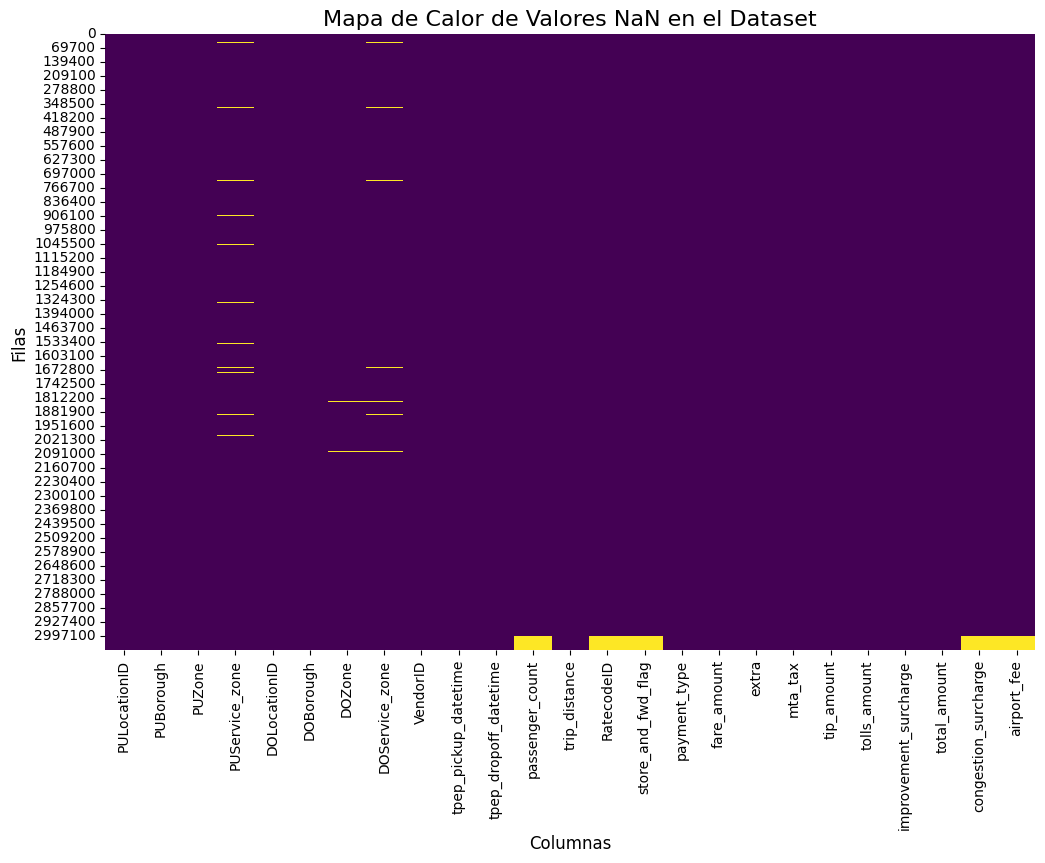

In [ ]:
# 3.a
# Crear el mapa de calor para visualizar los valores NaN
plt.figure(figsize=(12, 8))
sns.heatmap(df_combined2.isna(), cmap='viridis', cbar=False)

# Títulos
plt.title('Mapa de Calor de Valores NaN en el Dataset', fontsize=16)
plt.xlabel('Columnas', fontsize=12)
plt.ylabel('Filas', fontsize=12)

# Mostrar el gráfico
plt.show()


In [ ]:
# 3.b
# Identificar columnas con valores NaN
columnas_con_nan = df_combined2.columns[df_combined2.isnull().any()].tolist()

# Mostrar las columnas
print("Columnas que contienen valores NaN:")
print(columnas_con_nan)


Columnas que contienen valores NaN:
['PUZone', 'PUService_zone', 'DOZone', 'DOService_zone', 'passenger_count', 'RatecodeID', 'store_and_fwd_flag', 'congestion_surcharge', 'airport_fee']


In [ ]:
# 3.c
# Eliminar filas con al menos un valor NaN
df_combined = df_combined2.dropna()

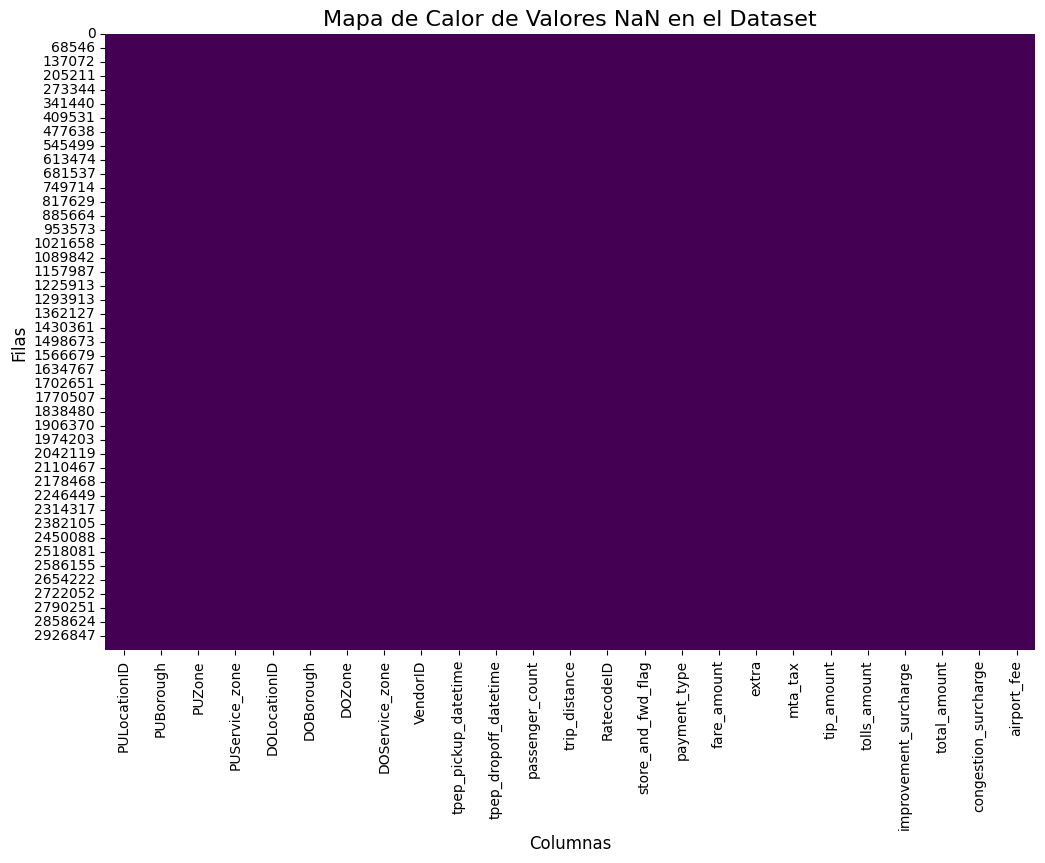

In [ ]:
# 3.d
# Creamos el mapa de calor para visualizar los valores NaN
plt.figure(figsize=(12, 8))
sns.heatmap(df_combined.isna(), cmap='viridis', cbar=False)

# Títulos y etiquetas
plt.title('Mapa de Calor de Valores NaN en el Dataset', fontsize=16)
plt.xlabel('Columnas', fontsize=12)
plt.ylabel('Filas', fontsize=12)

# Mostramos el gráfico
plt.show()

observamos que los valos NaN han sido eliminados

4. ¿Qué tipo de datos interpreta Python para cada variable del dataframe combinado de NYC Taxi?

In [ ]:
# 4
# Obtenemos el tipo de variables que interpreta Python
df_combined.dtypes

,0
PULocationID,int64
PUBorough,object
PUZone,object
PUService_zone,object
DOLocationID,int64
DOBorough,object
DOZone,object
DOService_zone,object
VendorID,int64
tpep_pickup_datetime,datetime64[us]


5. Sabiendo que:

- paymentType es el código numérico que identifica como el pasajero ha abonado el desplazamiento:

1= Credit card  
2= Cash  
3= No charge   
4= Dispute   
5= Unknown   
6= Voided trip  

5.a. Obtemos cuantos viajes totales tenemos por cada tipo de pago (payment_type)

In [ ]:
# 5.a
# Contamos el total de viajes por cada tipo de pago
payment_counts = df_combined['payment_type'].value_counts()

# Creamos un diccionario para mostrar los resultados con descripción de los códigos
payment_types = {
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided trip'
}

# Recorremos cada codigo y su recuento
print("Cantidad de viajes por tipo de pago:")
for payment_code, count in payment_counts.items():
    print(f"{payment_types.get(payment_code, 'Otro')} ({payment_code}): {count}")

Cantidad de viajes por tipo de pago:
Credit card (1): 2367711
Cash (2): 520042
Dispute (4): 32237
No charge (3): 17433


5.b. Aplicamos el cambio de tipo de pago para disponer de la descripción en vez de simplemente el número

In [ ]:
# 5.b
# Creamos un diccionario con los códigos y sus descripciones
payment_types = {
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided trip'
}

# Convertimos la columna al tipo 'object' para permitir asignación de strings
df_combined.loc[:,'payment_type'] = df_combined['payment_type'].astype(object)
# Aplicamos el mapeo directamente sobre la columna
df_combined.loc[:, 'payment_type'] = df_combined['payment_type'].map(payment_types)

# Verificar los resultados
print(df_combined[['payment_type']].head(10))

<ipython-input-14-e4f7790d66ae>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2 1 1 ... 1 1 2]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_combined.loc[:,'payment_type'] = df_combined['payment_type'].astype(object)


  payment_type
0         Cash
1  Credit card
2  Credit card
3  Credit card
4  Credit card
5  Credit card
6  Credit card
7  Credit card
8  Credit card
9         Cash


5.c Obtenemos de nuevo el total de viajes totales tenemos por la descripción de cada tipo de pago (payment_type)

In [ ]:
# 5.c
# Verificamos los resultados
print(df_combined['payment_type'].value_counts())

payment_type
Credit card    2367711
Cash            520042
Dispute          32237
No charge        17433
Name: count, dtype: int64


Como podemos observar, hemos obtenido el mismo resultado

6.a Mostrar los 5 destinos (DOBorough) más solicitados por número totales de viajes desde la zona de JFK Airport y contar el número total de viajes

In [ ]:
# 6.a
# Filtrar los viajes desde JFK Airport (PUZone = "JFK Airport")
jfk_trips = df_combined[df_combined['PUZone'] == 'JFK Airport']

# Contar el número total de viajes por DOBorough
doborough_counts = jfk_trips['DOBorough'].value_counts()

# Obtener los 5 destinos más solicitados
top_5_doborough = doborough_counts.head(5)

# Mostrar los resultados
print("Los 5 destinos más solicitados desde JFK Airport:")
print(top_5_doborough)

# Número total de viajes desde JFK Airport
total_trips = jfk_trips.shape[0]
print(f"Número total de viajes desde JFK Airport: {total_trips}")

Los 5 destinos más solicitados desde JFK Airport:
DOBorough
Manhattan    78798
Queens       43067
Brooklyn     28375
Bronx         3219
EWR            388
Name: count, dtype: int64
Número total de viajes desde JFK Airport: 154126


6.b Representamos la información anterior en un gráfico de barras horizontal donde el eje X sean los Destinos más frecuentes y el eje Y el total de viajes


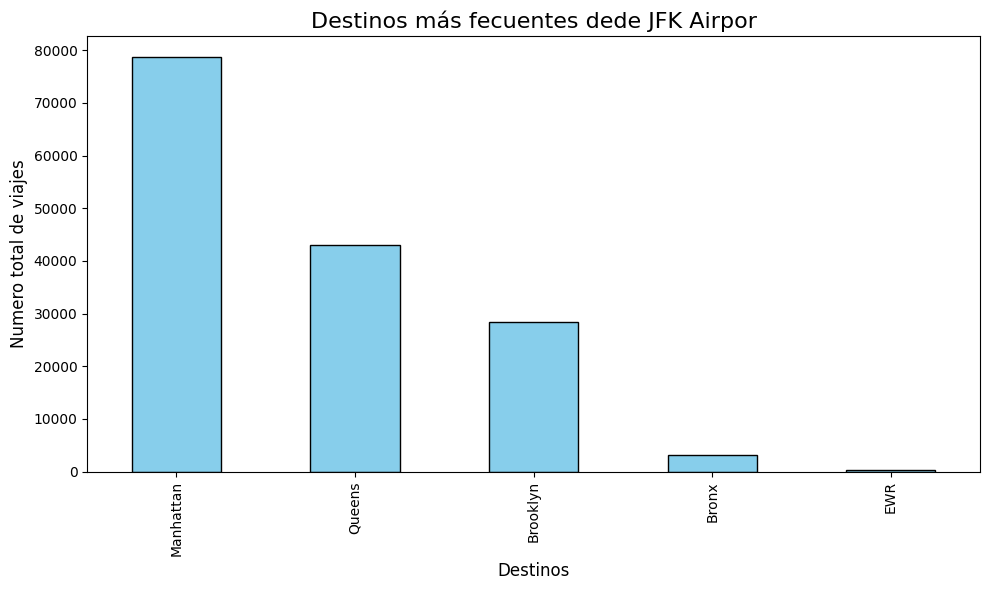

In [ ]:
# 6.b
# Creamos el grafico con el filtrado que hemos realizado en el anterior punto
plt.figure(figsize=(10,6))
top_5_doborough.plot(kind='bar', color='skyblue', edgecolor='black')


plt.title('Destinos más fecuentes dede JFK Airpor', fontsize=16)
plt.xlabel('Destinos', fontsize=12)
plt.ylabel('Numero total de viajes', fontsize=12)
plt.tight_layout()

plt.show()

7. ¿Cuánto obtuvo cada una de las empresas por los viajes realizados?

  Representamos en el diagrama de frecuencias el total abonado por los viajes para cada una de las empresas, utilizando su nombre.

  - VendorID = 1 -> Creative Mobile Technologies
  - VendorID = 2 -> VeriFone Inc

<ipython-input-18-9c3bea4f551b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined.loc[:,'VendorName'] = df_combined['VendorID'].map(vendedor_mapping)


Total obtenido por cada empresa:
VendorName
Creative Mobile Technologies    20252428.21
VeriFone Inc                    57571994.30
Name: total_amount, dtype: float64


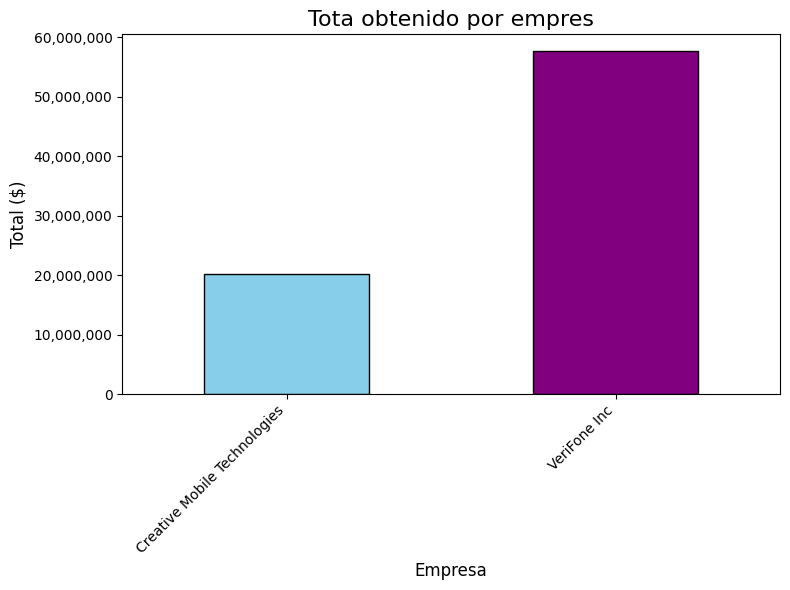

In [ ]:
# 7
from matplotlib.ticker import FuncFormatter

# creamos un diccionario para mapear los vendedorID con los nombres indicados
vendedor_mapping = {
    1 : 'Creative Mobile Technologies',
    2 : 'VeriFone Inc'
}

# remplazamos el VendedorID con el nombre de la empresa
df_combined.loc[:,'VendorName'] = df_combined['VendorID'].map(vendedor_mapping)

# calculamos el total abonado por cada empresa
total_by_vendedor = df_combined.groupby('VendorName')['total_amount'].sum()
# mostramos resultado
print('Total obtenido por cada empresa:')
print(total_by_vendedor)

# creamos el diagrama de frecuencias
plt.figure(figsize=(8, 6))
total_by_vendedor.plot(kind='bar', color=['skyblue', 'purple'], edgecolor='black')

# Ajustar el formato del eje y
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))

plt.title('Tota obtenido por empres', fontsize=16)
plt.xlabel('Empresa', fontsize=12)
plt.ylabel('Total ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# mostramos el grafico
plt.show()


8. Reemplazar los viajes con passenger_count = 0 por passenger_count = 1

In [ ]:
# 8
# Reemplazamos los valores indicados
df_combined.loc[df_combined['passenger_count'] == 0, 'passenger_count'] = 1

# Verificamos el resultado
print("Valores actualizados en passenger_count:")
print(df_combined['passenger_count'].value_counts())

Valores actualizados en passenger_count:
passenger_count
1.0    2268671
2.0     442394
3.0     104177
4.0      52072
5.0      42223
6.0      27869
8.0         13
7.0          3
9.0          1
Name: count, dtype: int64


9. Crear una columna que sea el total de tiempo de viaje y mostrar los 5 primeros registros

In [ ]:
# 9
import pandas as pd

# Nos aseguramos de que las columnas que vamos a utilizar tengan el formato correcto
df_combined.loc[:,'tpep_pickup_datetime'] = pd.to_datetime(df_combined['tpep_pickup_datetime'])
df_combined.loc[:,'tpep_dropoff_datetime'] = pd.to_datetime(df_combined['tpep_dropoff_datetime'])

# Creamos una nueva columna con la diferencia de tiempo (duración del viaje)
df_combined.loc[:,'trip_duration'] = (df_combined['tpep_dropoff_datetime'] - df_combined['tpep_pickup_datetime']).dt.total_seconds() / 60  # Duración en minutos

# Mostrar los 5 primeros registros
print(df_combined[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_duration']].head(5))

  tpep_pickup_datetime tpep_dropoff_datetime  trip_duration
0  2023-01-01 00:32:10   2023-01-01 00:40:36       8.433333
1  2023-01-01 00:55:08   2023-01-01 01:01:27       6.316667
2  2023-01-01 00:25:04   2023-01-01 00:37:49      12.750000
3  2023-01-01 00:03:48   2023-01-01 00:13:25       9.616667
4  2023-01-01 00:10:29   2023-01-01 00:21:19      10.833333


<ipython-input-20-6475836bcf79>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined.loc[:,'trip_duration'] = (df_combined['tpep_dropoff_datetime'] - df_combined['tpep_pickup_datetime']).dt.total_seconds() / 60  # Duración en minutos


10.a Representar la evolución temporal del número total de viajes por día desde 2023-01-01 a 2023-01-31.

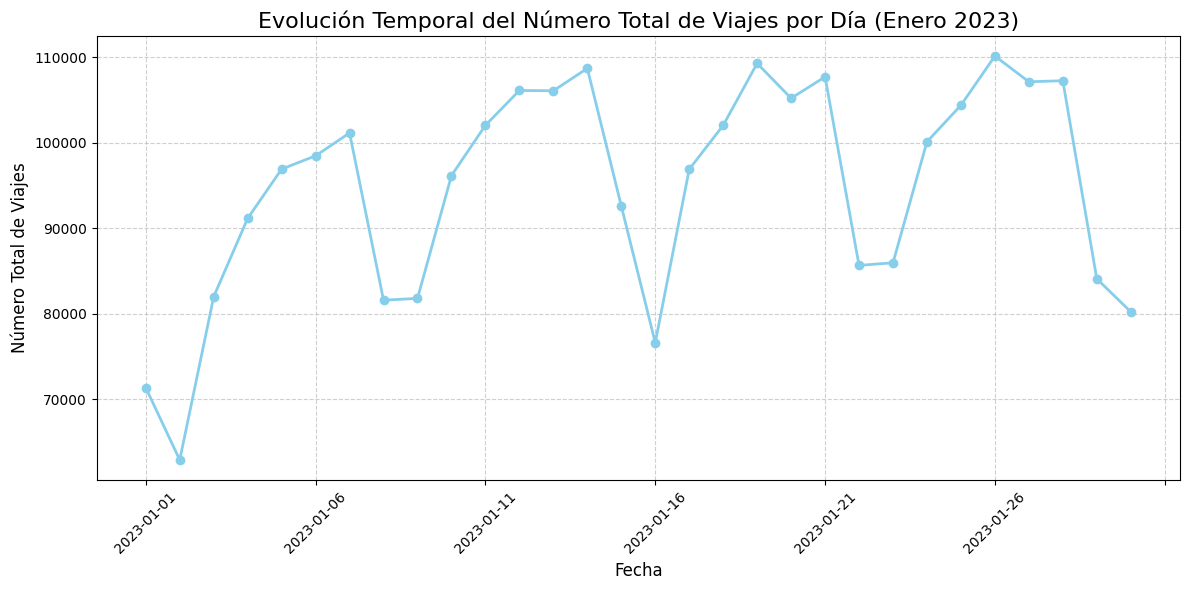

In [ ]:
# 10.a
# Filtramos las fechas dentro del rango especificado
mask = (df_combined['tpep_pickup_datetime'] >= '2023-01-01') & (df_combined['tpep_pickup_datetime'] <= '2023-01-31')
filtered_df = df_combined[mask]
filtered_df = filtered_df.copy()

# Creamos la columna tpep_pickup_datetime_yyyyMMdd con el formato YYYY-MM-dd
filtered_df['tpep_pickup_datetime_yyyyMMdd'] = filtered_df['tpep_pickup_datetime'].dt.strftime('%Y-%m-%d')


# Agrupamos por fecha para contar el total de viajes por día
daily_trips = filtered_df.groupby('tpep_pickup_datetime_yyyyMMdd').size()

# Creamos el gráfico de evolución temporal
plt.figure(figsize=(12, 6))
daily_trips.plot(kind='line', color='skyblue', linewidth=2, marker='o')

# Personalización del gráfico
plt.title('Evolución Temporal del Número Total de Viajes por Día (Enero 2023)', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Número Total de Viajes', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostramos el gráfico
plt.show()

10.b Repetir la evolución pero diferenciando en líneas de colores distintos por la variable discretivada 'PUBorough'.

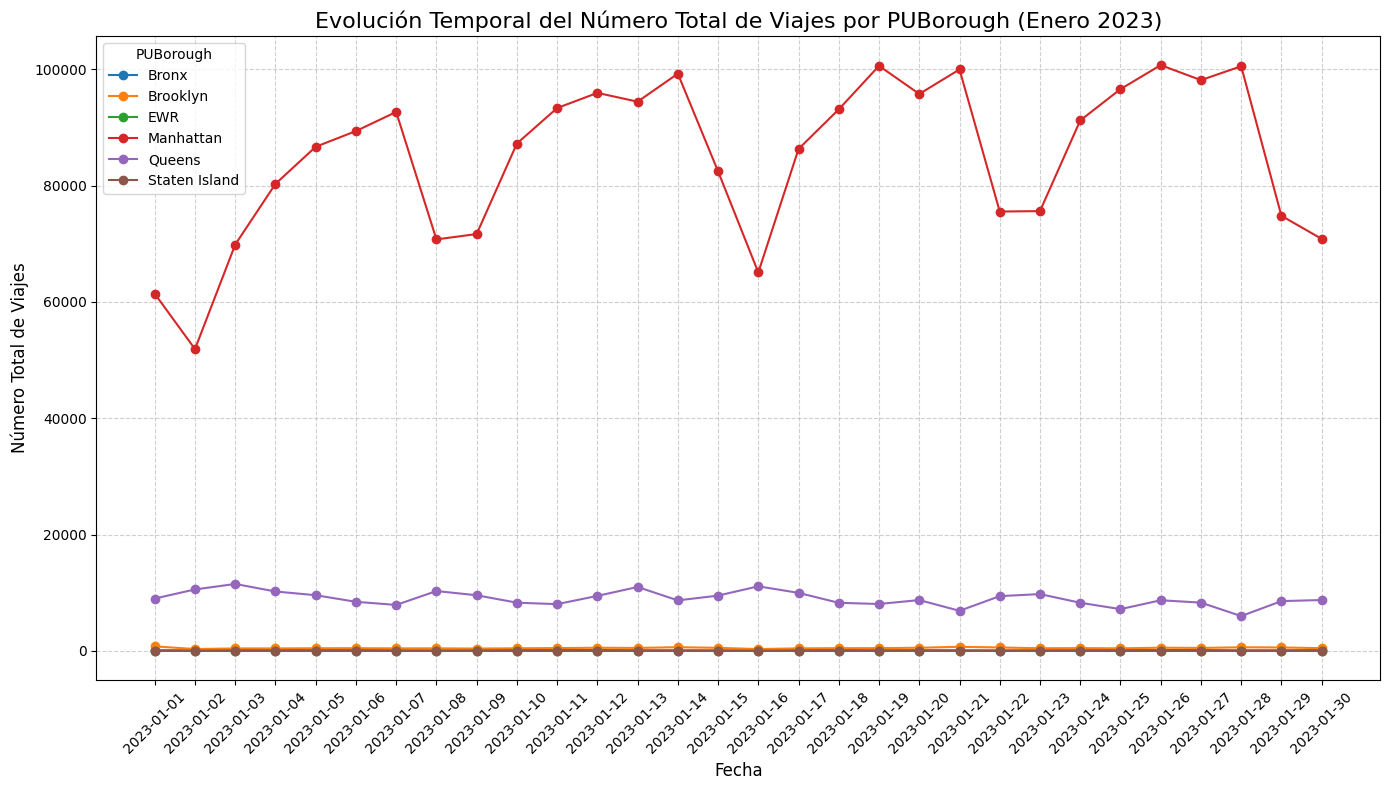

In [ ]:
# 10.b

# Agrupamos por PUBorough y por fecha
daily_trips_by_borough = filtered_df.groupby(['PUBorough', 'tpep_pickup_datetime_yyyyMMdd']).size().unstack(level=0)

# Creamos el gráfico de evolución temporal
plt.figure(figsize=(14, 8))
for borough in daily_trips_by_borough.columns:
    plt.plot(daily_trips_by_borough.index, daily_trips_by_borough[borough], marker='o', label=borough)


plt.title('Evolución Temporal del Número Total de Viajes por PUBorough (Enero 2023)', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Número Total de Viajes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='PUBorough', fontsize=10)
plt.tight_layout()

# Mostramos el gráfico
plt.show()

11. Mostrar en un gráfico de barras el total de viajes por el día de la semana (eje de las X los días de la semana ordenados, eje de las Y el total de viajes)

<ipython-input-23-c68e90b505de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined.loc[:,'pickup_weekday'] = df_combined['tpep_pickup_datetime'].dt.day_name()


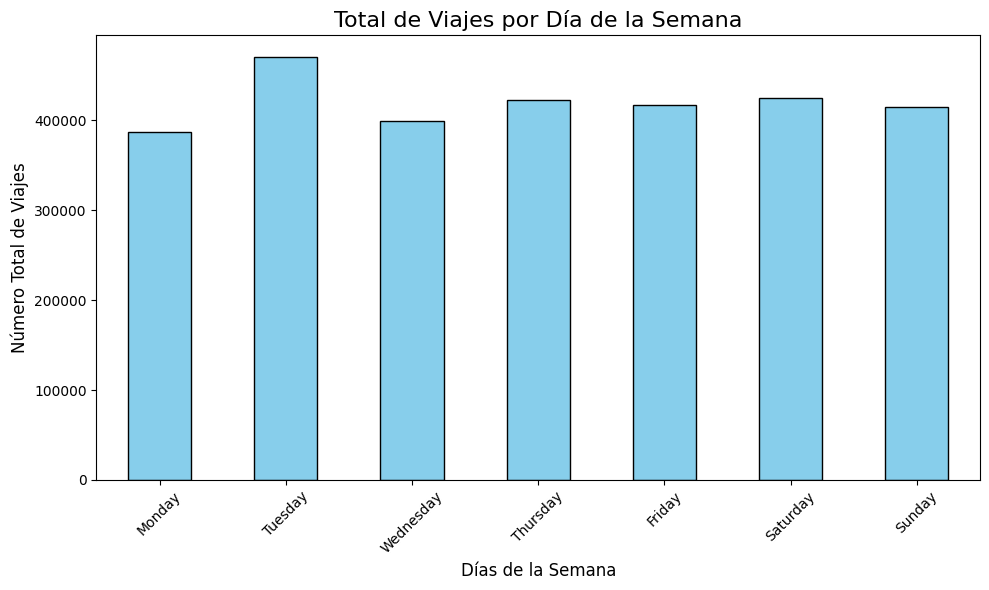

In [ ]:
# 11
# Crear una columna con el día de la semana
df_combined.loc[:,'pickup_weekday'] = df_combined['tpep_pickup_datetime'].dt.day_name()

# Ordenar los días de la semana
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Agrupar por día de la semana y contar el número total de viajes
weekday_trips = df_combined['pickup_weekday'].value_counts().reindex(weekday_order)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
weekday_trips.plot(kind='bar', color='skyblue', edgecolor='black')

# Personalizar el gráfico
plt.title('Total de Viajes por Día de la Semana', fontsize=16)
plt.xlabel('Días de la Semana', fontsize=12)
plt.ylabel('Número Total de Viajes', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

12. Ahora repetimos lo anterior, pero realizando la agrupacion por la suma de la distancia.

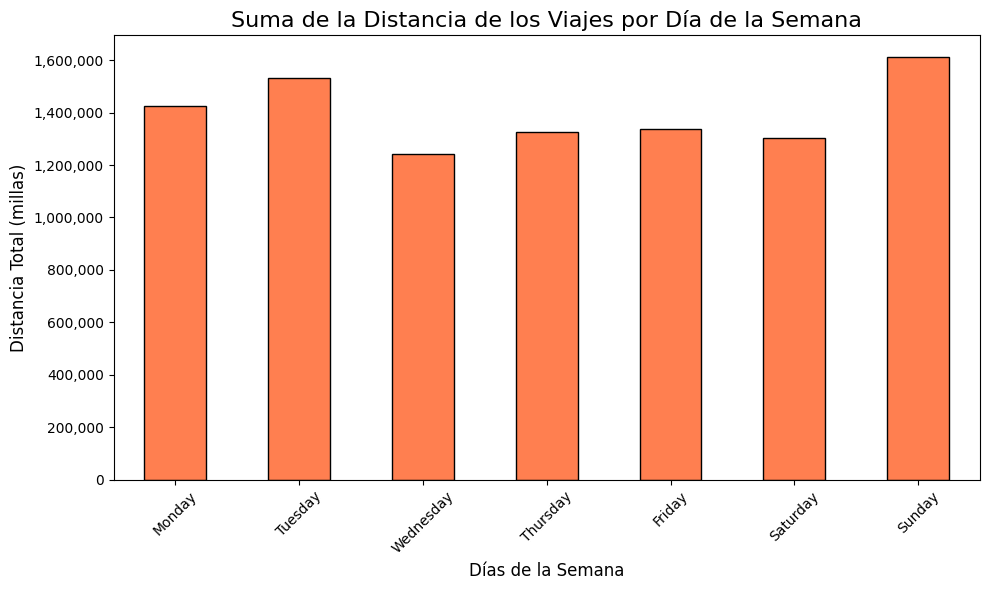

In [ ]:
# 12
from matplotlib.ticker import FuncFormatter

# Agrupamos por el día de la semana y calculamos la suma de la distancia
weekday_distance = df_combined.groupby('pickup_weekday')['trip_distance'].sum().reindex(weekday_order)

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
weekday_distance.plot(kind='bar', color='coral', edgecolor='black')

# Ajustamos el formato del eje Y para evitar la notación científica
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:,.0f}"))

# Personalizar el gráfico
plt.title('Suma de la Distancia de los Viajes por Día de la Semana', fontsize=16)
plt.xlabel('Días de la Semana', fontsize=12)
plt.ylabel('Distancia Total (millas)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostramos el gráfico
plt.show()

13. Combinando ambos dataframes, calcula la distancia media por dia y crea un gráfico de barras.

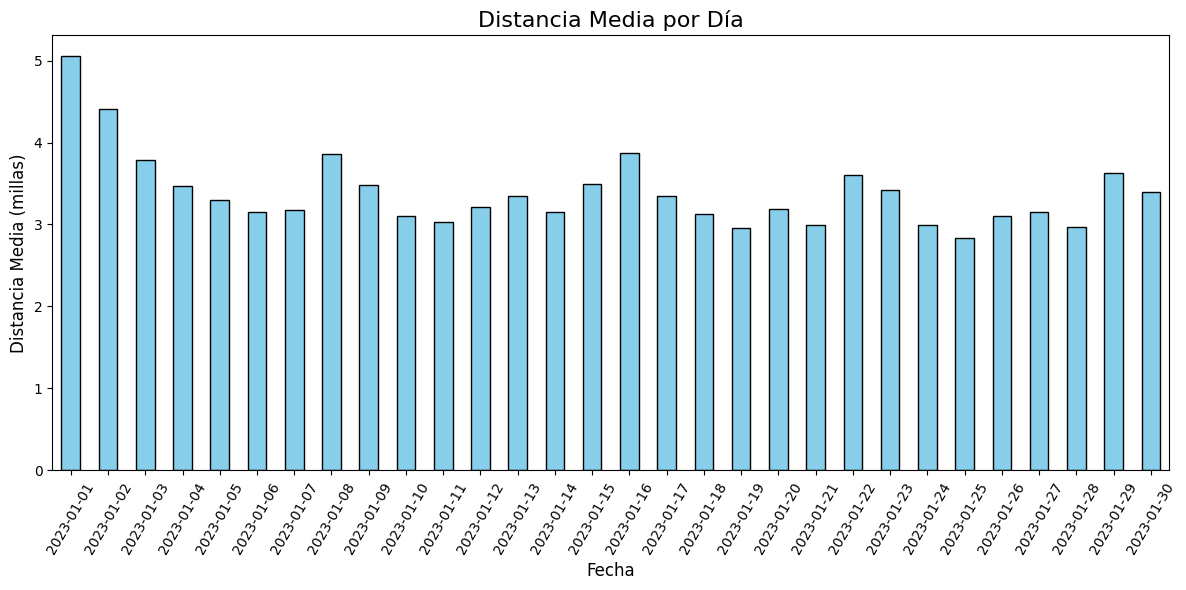

In [ ]:
# 13

# Combinamos los DataFrames por la columna de fecha
df_NYCtaxi = pd.merge(filtered_df[['tpep_pickup_datetime_yyyyMMdd']],
                     df_combined,
                     left_index=True,
                     right_index=True)

# Agrupamos por fecha y calculamos la distancia media
mean_distance_per_day = df_NYCtaxi.groupby('tpep_pickup_datetime_yyyyMMdd')['trip_distance'].mean()

# Creamos el gráfico de barras
plt.figure(figsize=(12, 6))
mean_distance_per_day.plot(kind='bar', color='skyblue', edgecolor='black')

# Personalizamos el gráfico
plt.title('Distancia Media por Día', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Distancia Media (millas)', fontsize=12)
plt.xticks(rotation=60)
plt.tight_layout()

# Mostramos el gráfico
plt.show()

14. Sabiendo que:

- rateCodeId es el código numérico que identifica el código de tarifa en función del destino del viaje, vamos a crear una nueva columna con la descripción de dicho código, con la correspondencia que indicamos abajo:

1= Standard rate  
2= JFK  
3= Newark   
4= Nassau or Westchester   
5= Negotiated fare   
6= Group ride

Muestra los 5 primeros valores del dataframe

In [ ]:
# 14
# Creamos un diccionario para mapear rateCodeId a las descripciones
rate_code_mapping = {
    1: 'Standard rate',
    2: 'JFK',
    3: 'Newark',
    4: 'Nassau or Westchester',
    5: 'Negotiated fare',
    6: 'Group ride'
}

# Creamos la nueva columna con las descripciones de los códigos
df_NYCtaxi['rate_code_description'] = df_NYCtaxi['RatecodeID'].map(rate_code_mapping)

# Mostramos los 5 primeros registros del DataFrame
print(df_NYCtaxi.head(5))

  tpep_pickup_datetime_yyyyMMdd  PULocationID  PUBorough             PUZone  \
0                    2023-01-01           161  Manhattan     Midtown Center   
1                    2023-01-01            43  Manhattan       Central Park   
2                    2023-01-01            48  Manhattan       Clinton East   
3                    2023-01-01           138     Queens  LaGuardia Airport   
4                    2023-01-01           107  Manhattan           Gramercy   

  PUService_zone  DOLocationID  DOBorough                 DOZone  \
0    Yellow Zone           141  Manhattan        Lenox Hill West   
1    Yellow Zone           237  Manhattan  Upper East Side South   
2    Yellow Zone           238  Manhattan  Upper West Side North   
3       Airports             7     Queens                Astoria   
4    Yellow Zone            79  Manhattan           East Village   

  DOService_zone  VendorID  ... tip_amount tolls_amount  \
0    Yellow Zone         2  ...       0.00          0.0  

### **Parte B. Planteamiento del problema y del modelo**

El objetivo que se quiere conseguir con el modelo es, a partir de las variables ['company_rating','exp_required', 'days_ago'] del dataset, ser capaces de predecir el rango mímino del salario ['salary_offered'] si consiguiera el trabajo.

1.	¿Qué problema queremos resolver, de clasificación o de regresión?

El objetivo que se plantea se clasifica como un problema de regresión. La razón es que el modelo busca predecir un valor numérico, en este caso, el rango mínimo del salario ofrecido si se consiguiera el trabajo.

Motivos por lo que sería un problema de regresión y no de clasificación:

+ La variable `salary_offered`, representa una cantidad que es numérica, no una categoría discreta, esto es característico de problemas de regresión.

+ Las variables `company_rating`, `exp_required`, y `days_ago` son usadas como predictores para determinar el valor exacto o estimado del salario.

+ En este caso no se trata de clasificar datos en categorias predefinidas, como "bajo", "medio", "alto", sino de estimar directamente un número.

+ Los modelos de regresión son ampliamente usados para predicciones salariales en función de características como experiencia, ubicación, calificación, etc.  


2.	Modelo de Regresion

In [ ]:
# CÓDIGO MODELO REGRESIÓN
"""
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
# definir entrada-salida
X=dfTaxiNYC[['trip_distance','congestion_surcharge']].values
y=dfTaxiNYC[['total_amount']].values

# Definir el tipo de modelo
model_r = LinearRegression()
# Ajustar el modelo a todo dataset
model_r.fit(X, y)

"""

In [ ]:
# CÓDIGO MODELO CLASIFICACIÓN
"""
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
# definir entrada-salida
X=dfTaxiNYC[['trip_distance','congestion_surcharge']].values
y=dfTaxiNYC[['total_amount']].values

# Definir el tipo de modelo
model = LogisticRegression(multi_class='multinomial', solver='lbfgs',  random_state=0)
# Ajustar el modelo a todo dataset
model.fit(X, y)

"""

In [ ]:
from sklearn.linear_model import LinearRegression

# Definir entrada (X) y salida (y)
X = df_NYCtaxi[['trip_distance', 'congestion_surcharge']].values
y = df_NYCtaxi[['total_amount']].values

# Definir el tipo de modelo de regresión
model_r = LinearRegression()

# Ajustar el modelo al dataset completo
model_r.fit(X, y)

# Mostrar los coeficientes del modelo
print("Coeficientes del modelo:", model_r.coef_)
print("Intercepto del modelo:", model_r.intercept_)

Coeficientes del modelo: [[ 0.05264016 -2.81143195]]
Intercepto del modelo: [32.76245879]


Los valores obtenidos en los coeficientes del modelo, nos indican que en la variable `trip_distance` por cada milla adicional recorrida, el coste total (total_amount) aumenta en 0.0526 unidades. Este coeficiente tiene sentido, ya que la distancia recorrida es u factor que incrementa el coste.

Por otro lado, tenemos el coeficciente -2.8114 para la variable `congestion_surcharge`, este valor negativo implica que, según el modelo, un aumento en el recargo por congestión de trafico tiende a disminuir el coste total del viaje. Este comportamiento es contraintuitivo, por lo que nos sugiere que puede habaer una relación indirecta o incorreta entre las variables, influencia de valores anómalos en los datos de la variable como recargos negativos o tambien puede ser que el coste del viaje tenga descuento a cuanto mayor o menor distancia recorrida y congestion de trafico, pero esto habría que analizarlo para extraer conclusiones.

El interceptor nos indica el coste base cuando tanto la distancia como el recargo son cero.

3. Una vez ajustado el modelo, contestar a cuál es el coste del viaje ('total_amount') si la distancia recorrida ('trip_distance') son 7.00 millas y el tráfico estaba congestionado, lo que originó un cargo adicional de ('congestion_surcharge') 3.5

In [ ]:
# 3
# Definimos los valores de las características para la predicción
trip_distance = 7.00
congestion_surcharge = 3.5
features = [[trip_distance, congestion_surcharge]]

# Utilizar el modelo ajustado para predecir el total_amount
predicted_total_amount = model_r.predict(features)

# Mostrar el resultado
print(f"El coste del viaje ('total_amount') es: ${predicted_total_amount[0][0]:.2f}")

El coste del viaje ('total_amount') es: $23.29
